In [1]:
# just in-case installs
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels
!pip install pyqt5-tools

# IMPORT LIBRARIES

In [63]:
# importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import bioinfokit as bio

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans

from collections import Counter
from bioinfokit.visuz import cluster

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [7]:
# peeking at the dataset

data= pd.read_csv('mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [8]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 1453
Number of columns: 15


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [13]:
print(data.select_dtypes(exclude=np.number).columns)
print('------------------------------------------------')
print(data.select_dtypes(include=np.number).columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency',
       'Gender'],
      dtype='object')
------------------------------------------------
Index(['Age'], dtype='object')


In [12]:
data.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [14]:
data.mean()


Age    44.604955
dtype: float64

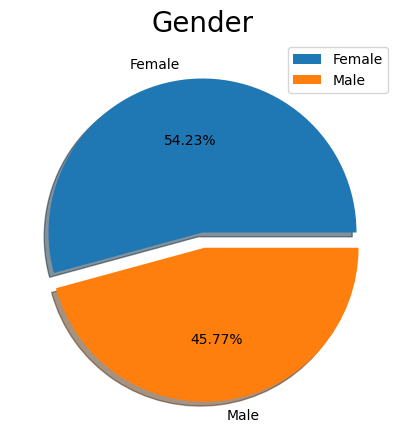

In [15]:
# Demographic segmentation using 'Age' & 'Gender

labels = ['Female', 'Male']
size = data['Gender'].value_counts()
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [72]:
#female is higher 
#male is lesser then female

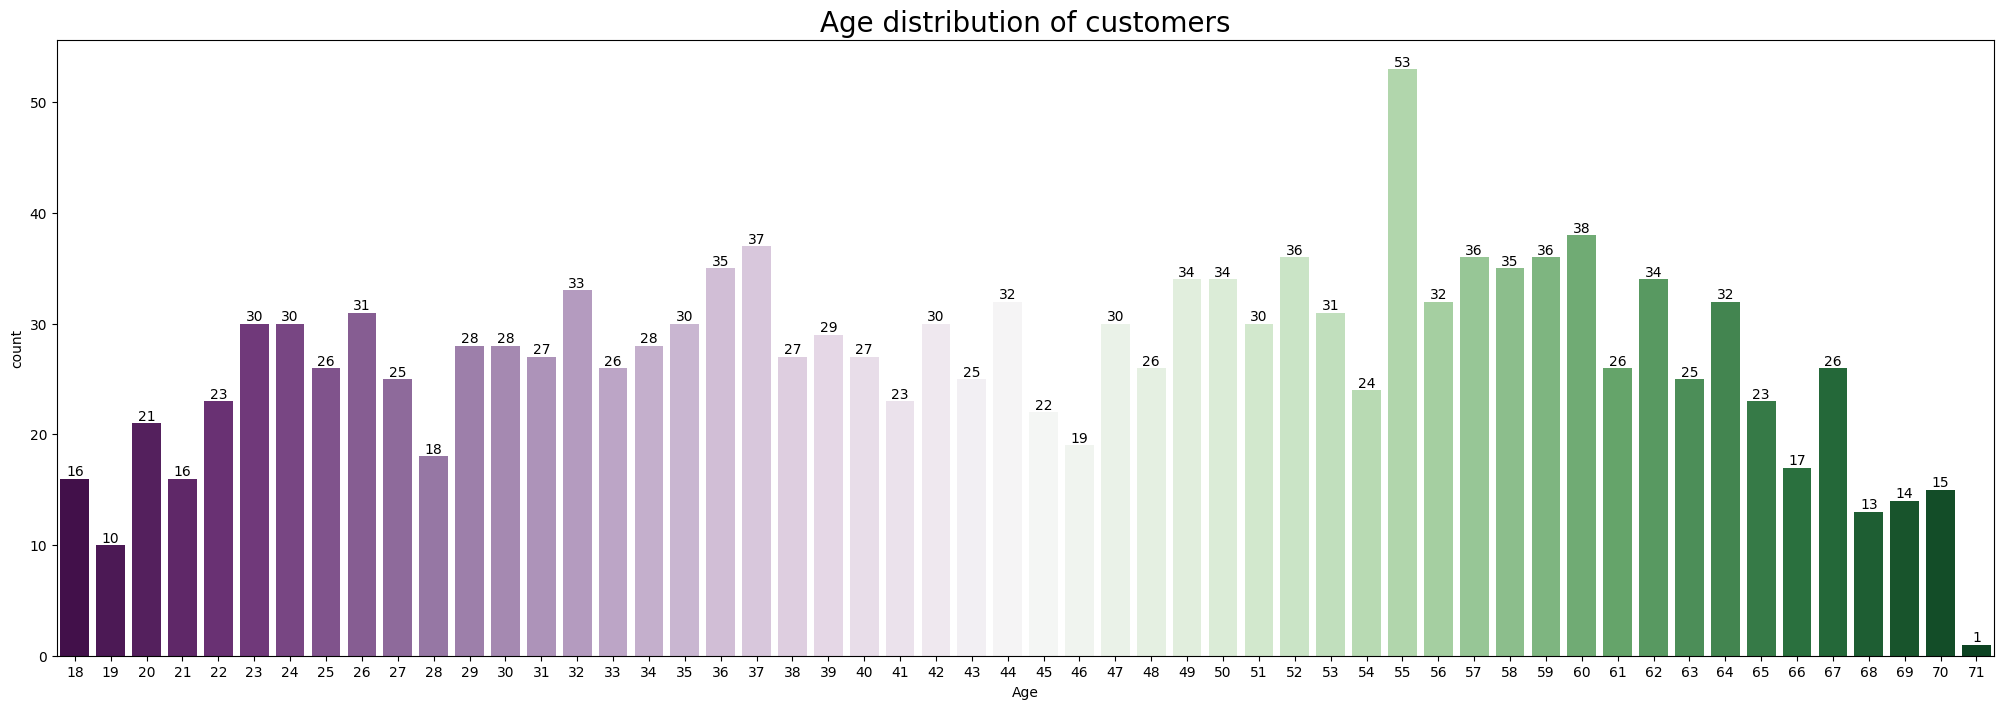

In [16]:
# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40

plt.rcParams['figure.figsize'] = (25, 8)
c = sns.countplot(x = data['Age'], palette = 'PRGn')
c.bar_label(c.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

<Figure size 500x500 with 0 Axes>

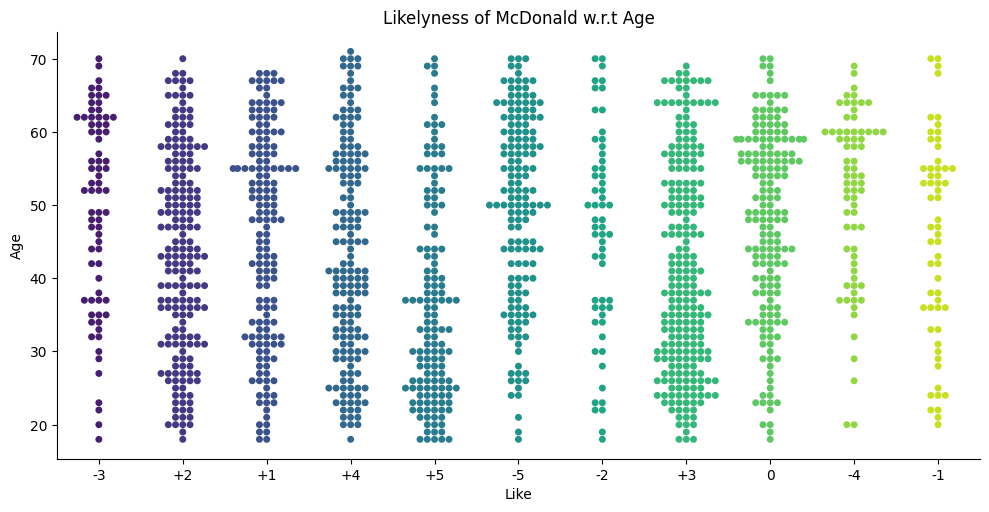

In [17]:
# Pyschographic segmentation using 'Like'

# renaming the category for convinence 
data["Like"] = data["Like"].replace({'I hate it!-5': '-5', 'I love it!+5':'+5'})
# plotting the results

plt.figure(figsize = (5,5))
sns.catplot(data = data, x = "Like", y = "Age", orient = "v", height = 5, aspect = 2, palette = "viridis", kind = "swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

# DATA PREPROCESSING

In [18]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

# except age all other collumns were categorical collumn

In [20]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [73]:
#no null values in data set

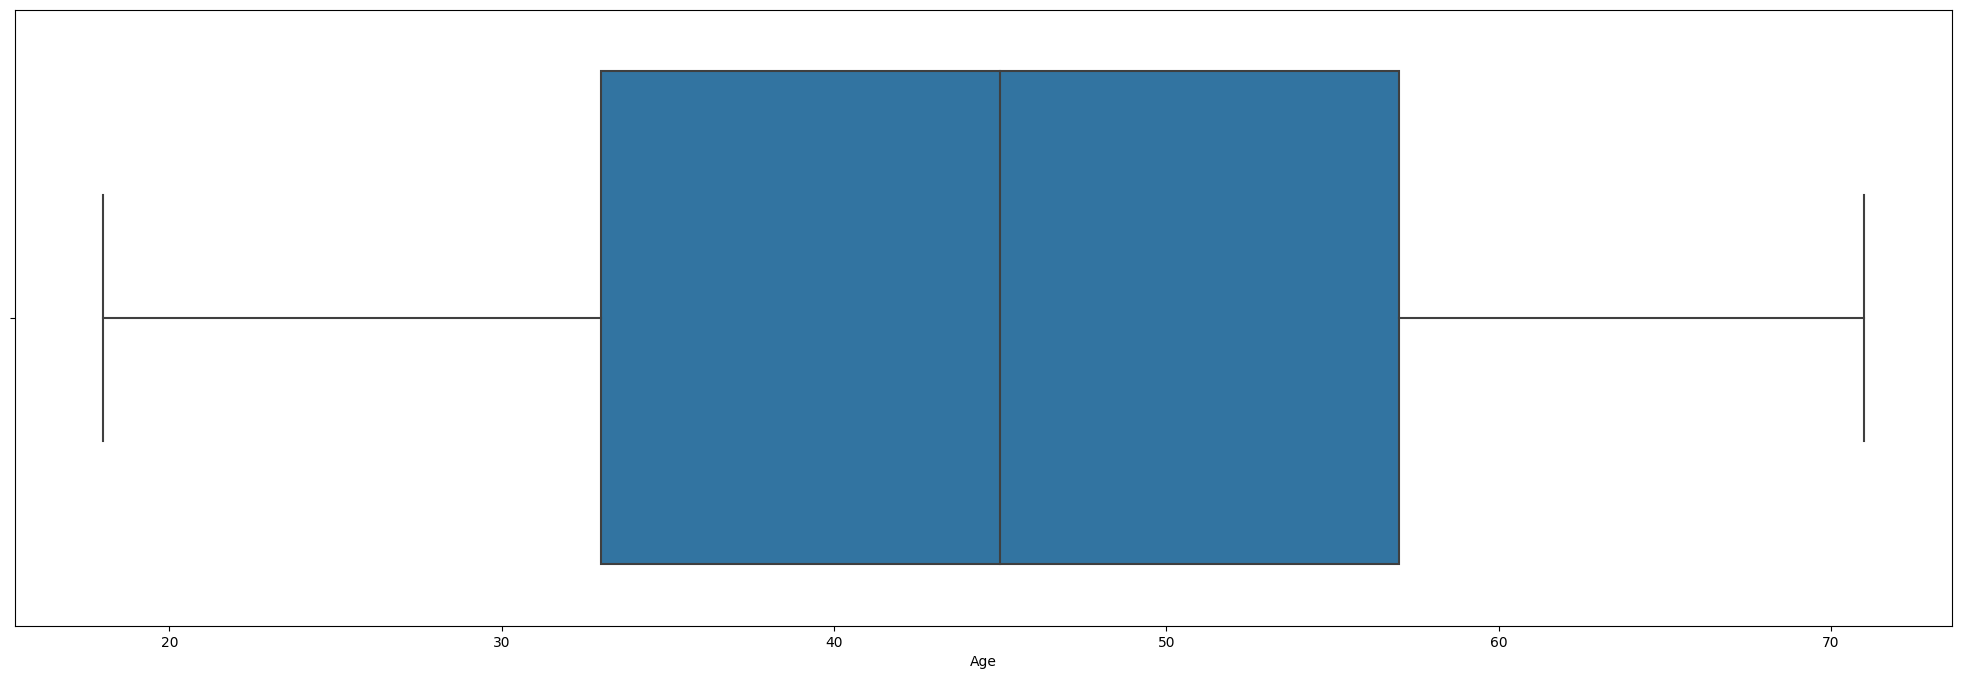

In [22]:
#have outliers?
for i in data.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [74]:
#no outliers 

Age
Skew: -0.0900699641298046


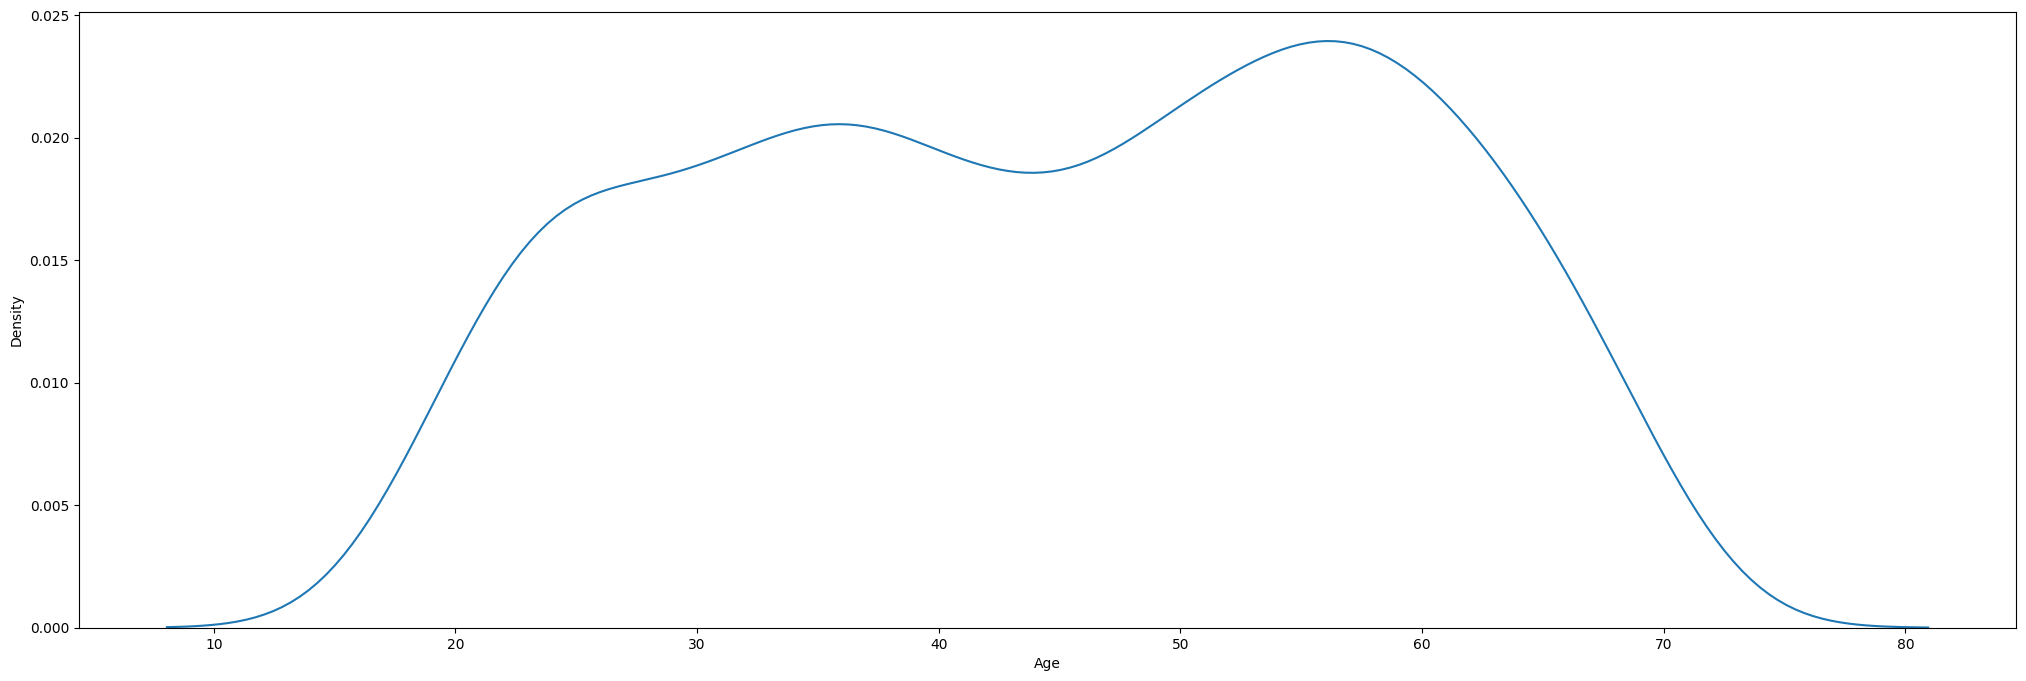

In [23]:
## Is the data normally distributed? Is it a defect? Why or why not?
for i in data.select_dtypes(include=np.number):
    print(i)
    sns.kdeplot(df[i])
    print('Skew:',df[i].skew())
    plt.show()

In [24]:
# LabelEncoder will map 'Yes' to 1 and 'No' to 0

le = LabelEncoder()

cols=["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
    
for i in cols:
    data[i] = le.fit_transform(data[i])

In [25]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>],
       [<Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>],
       [<Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>,
        <Axes: title={'center': 'expensive'}>],
       [<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

<Figure size 2500x2500 with 0 Axes>

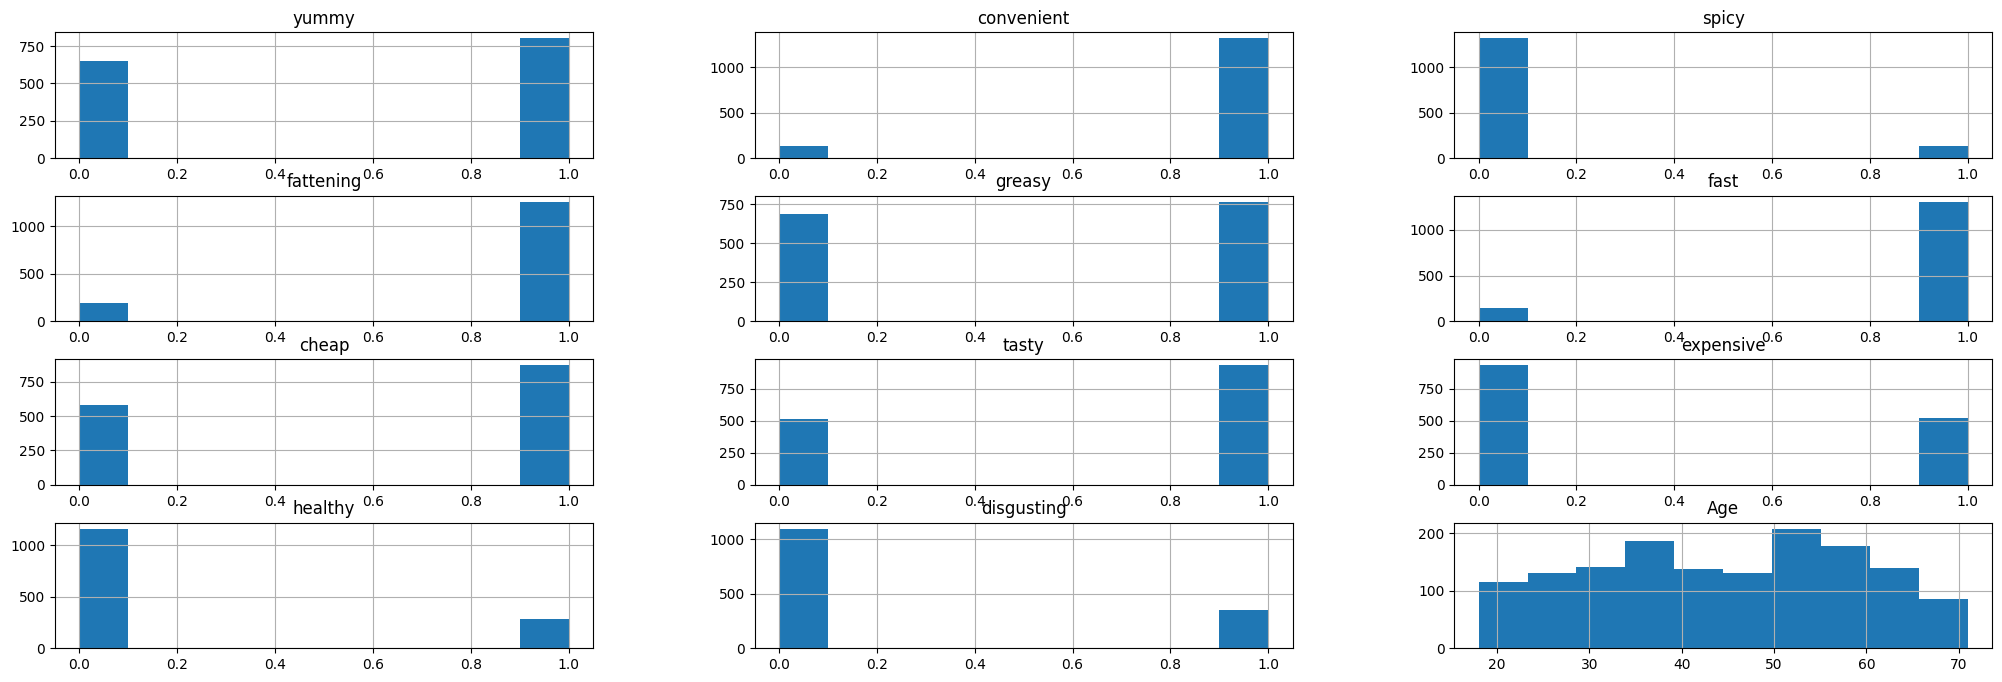

In [26]:
plt.figure(figsize=(25,25))
data.hist()

# PCA

In [27]:
x = data.loc[:, cols]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


# Applying pca

In [28]:
# applying scaling and PCA

pca_data = preprocessing.scale(x)

pca = PCA(n_components = 11)
pc = pca.fit_transform(x)

names = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]

pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [29]:
# Standard deviation

std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))
    
print("Standard Deviation :\n", np.array(std_dev))

Standard Deviation :
 [0.75678896 0.60724649 0.50444578 0.39866134 0.33728888 0.31016782
 0.28959761 0.27502727 0.2651598  0.24875617 0.23682131]


In [30]:
# variance (from PC1 to PC11)

pov = pca.explained_variance_ratio_
print("Proportion of Variance : \n", pov)

Proportion of Variance : 
 [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [31]:
# cumsum Variance

cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion : \n", cp)

Cumulative Proportion : 
 [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [32]:
components = pca.components_
num_pc = pca.n_features_
pc_name = ["PC" + str(i) for i in range(1, num_pc + 1)]
loadings_df = pd.DataFrame

# Applying the Elbow Method

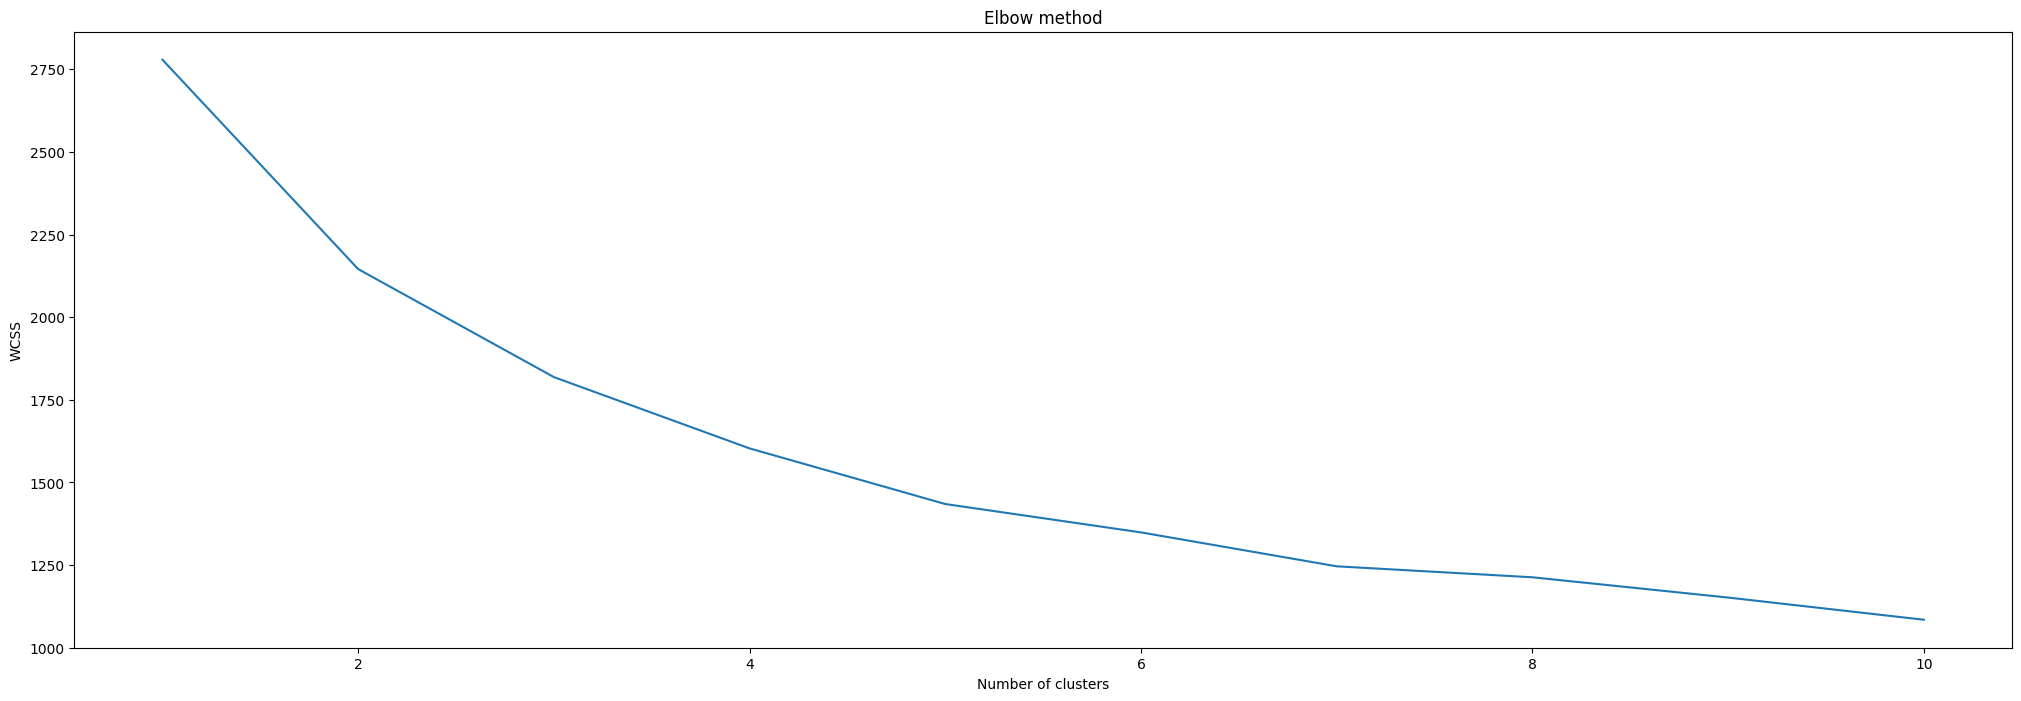

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Applying the K-Means Clustering Algorithm

In [35]:
#K-means clustering 

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit(x)
data['cluster_num'] = kmeans.labels_
print (kmeans.labels_)
print (kmeans.inertia_) 
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[2 0 0 ... 0 1 3]
1603.0604440558945
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [36]:
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

In [37]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


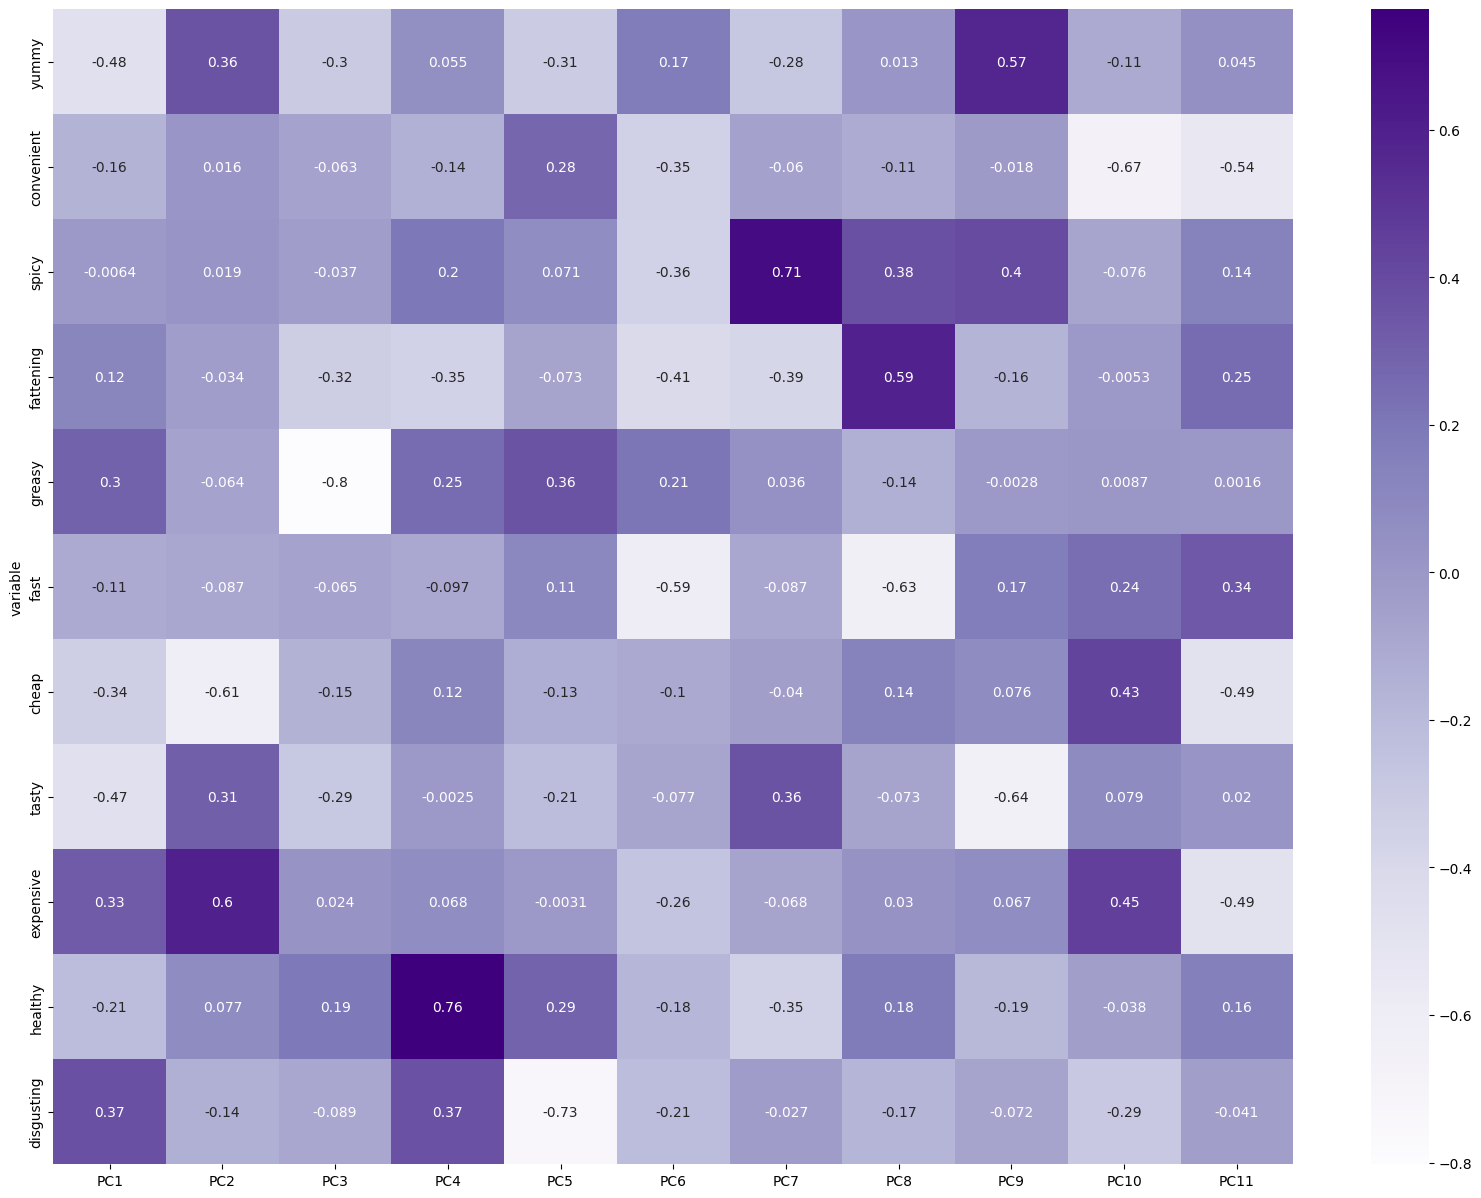

In [39]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples')
plt.show()


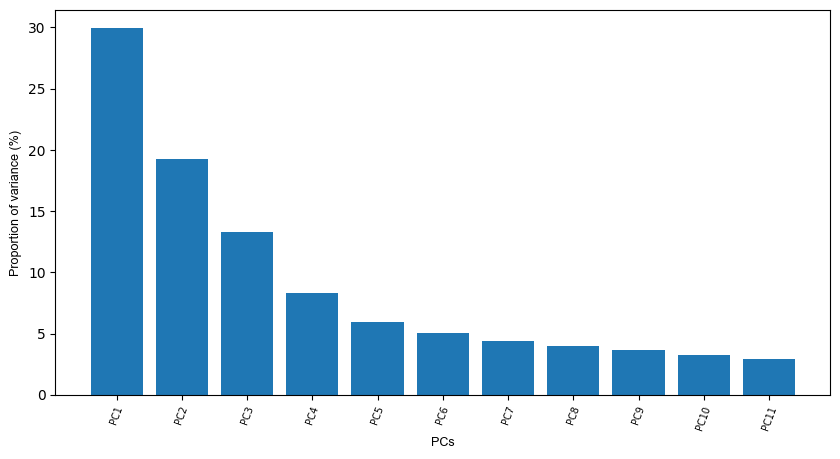

In [40]:
#Scree plot (Elbow test)- PCA

cluster.screeplot(obj = [pc_list, pca.explained_variance_ratio_], show = True, dim = (10,5))
pca_scores = PCA().fit_transform(x)

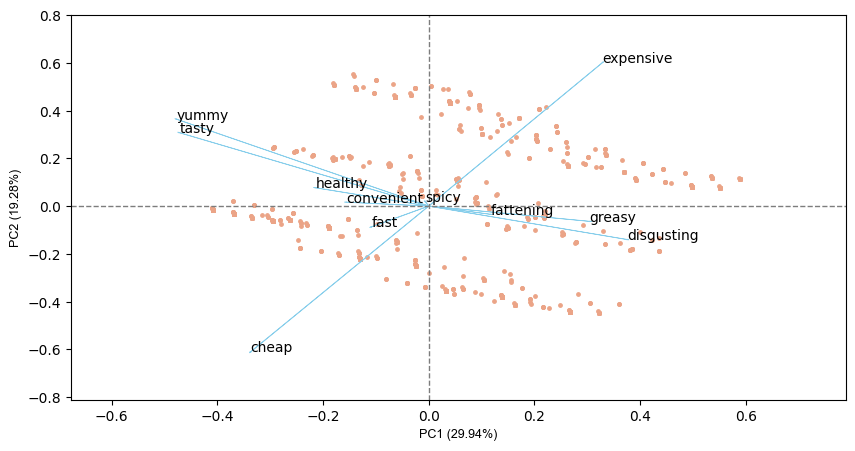

In [41]:
# get 2D biplot
cluster.biplot(cscore = pca_scores, loadings = loadings, labels = data.columns.values, var1 = round(pca.explained_variance_ratio_[0]*100, 2),
    var2 = round(pca.explained_variance_ratio_[1] * 100, 2), show = True, dim = (10,5))


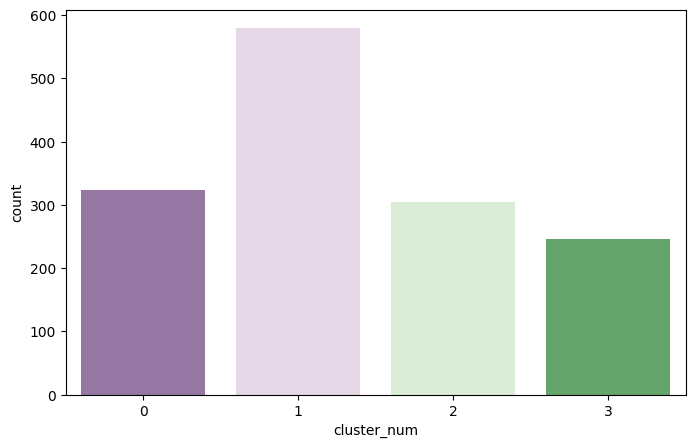

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x = data["cluster_num"], palette = 'PRGn')
plt.show()

In [43]:
data1 = pd.get_dummies(data, prefix = ['cluster_num'], columns = ['cluster_num'])
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,1,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,0,1,0,0


In [44]:
#Gender

result=[]
for i in cols:
    Gender = data.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    result.append(Gender)

In [45]:
for i in range(len(result)):
    print(pd.DataFrame(result[i]))


   cluster_num     yummy
0            0  0.854489
1            1  0.887931
2            2  0.023026
3            3  0.020325
   cluster_num  convenient
0            0    0.962848
1            1    0.981034
2            2    0.891447
3            3    0.682927
   cluster_num     spicy
0            0  0.133127
1            1  0.086207
2            2  0.072368
3            3  0.085366
   cluster_num  fattening
0            0   0.907121
1            1   0.794828
2            2   0.924342
3            3   0.914634
   cluster_num    greasy
0            0  0.619195
1            1  0.329310
2            2  0.667763
3            3  0.695122
   cluster_num      fast
0            0  0.860681
1            1  0.960345
2            2  0.963816
3            3  0.731707
   cluster_num     cheap
0            0  0.108359
1            1  0.922414
2            2  0.934211
3            3  0.065041
   cluster_num     tasty
0            0  0.931889
1            1  0.975862
2            2  0.154605
3         

In [46]:
data1 = pd.get_dummies(data, prefix = ['VisitFrequency'], columns = ['VisitFrequency'])
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,Gender,cluster_num,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,...,-3,61,Female,2,1,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,...,+2,51,Female,0,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,...,+1,62,Female,0,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,...,+4,69,Female,1,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,...,+2,49,Male,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,-5,47,Male,3,0,0,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,...,+2,36,Female,1,0,0,0,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,...,+3,52,Female,0,0,0,0,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,...,+4,41,Male,1,1,0,0,0,0,0


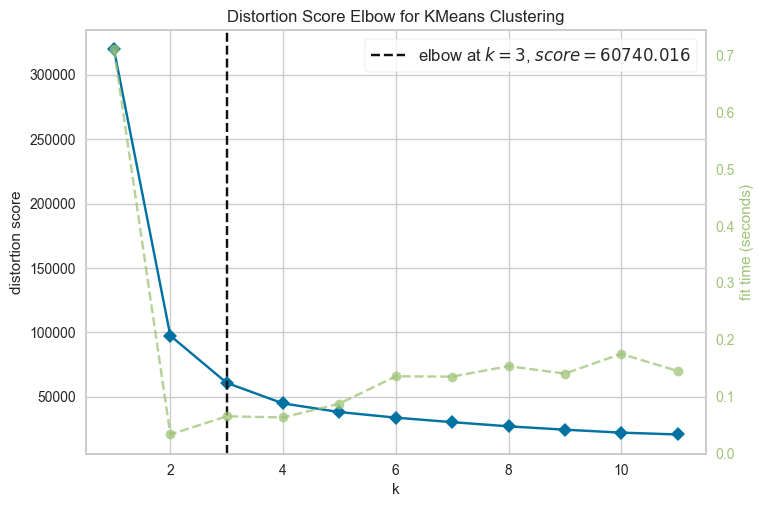

In [68]:
# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data)
visualizer.show();

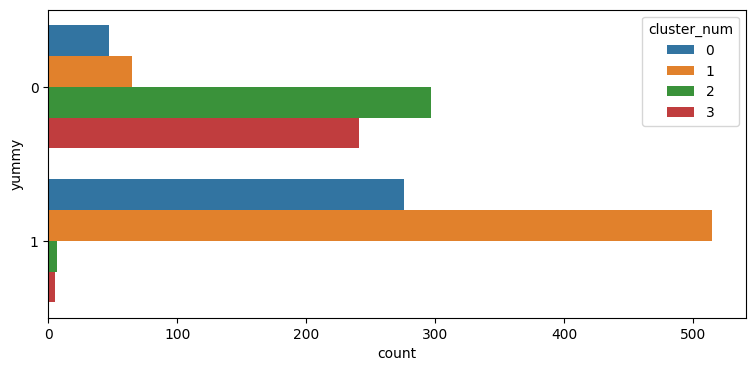

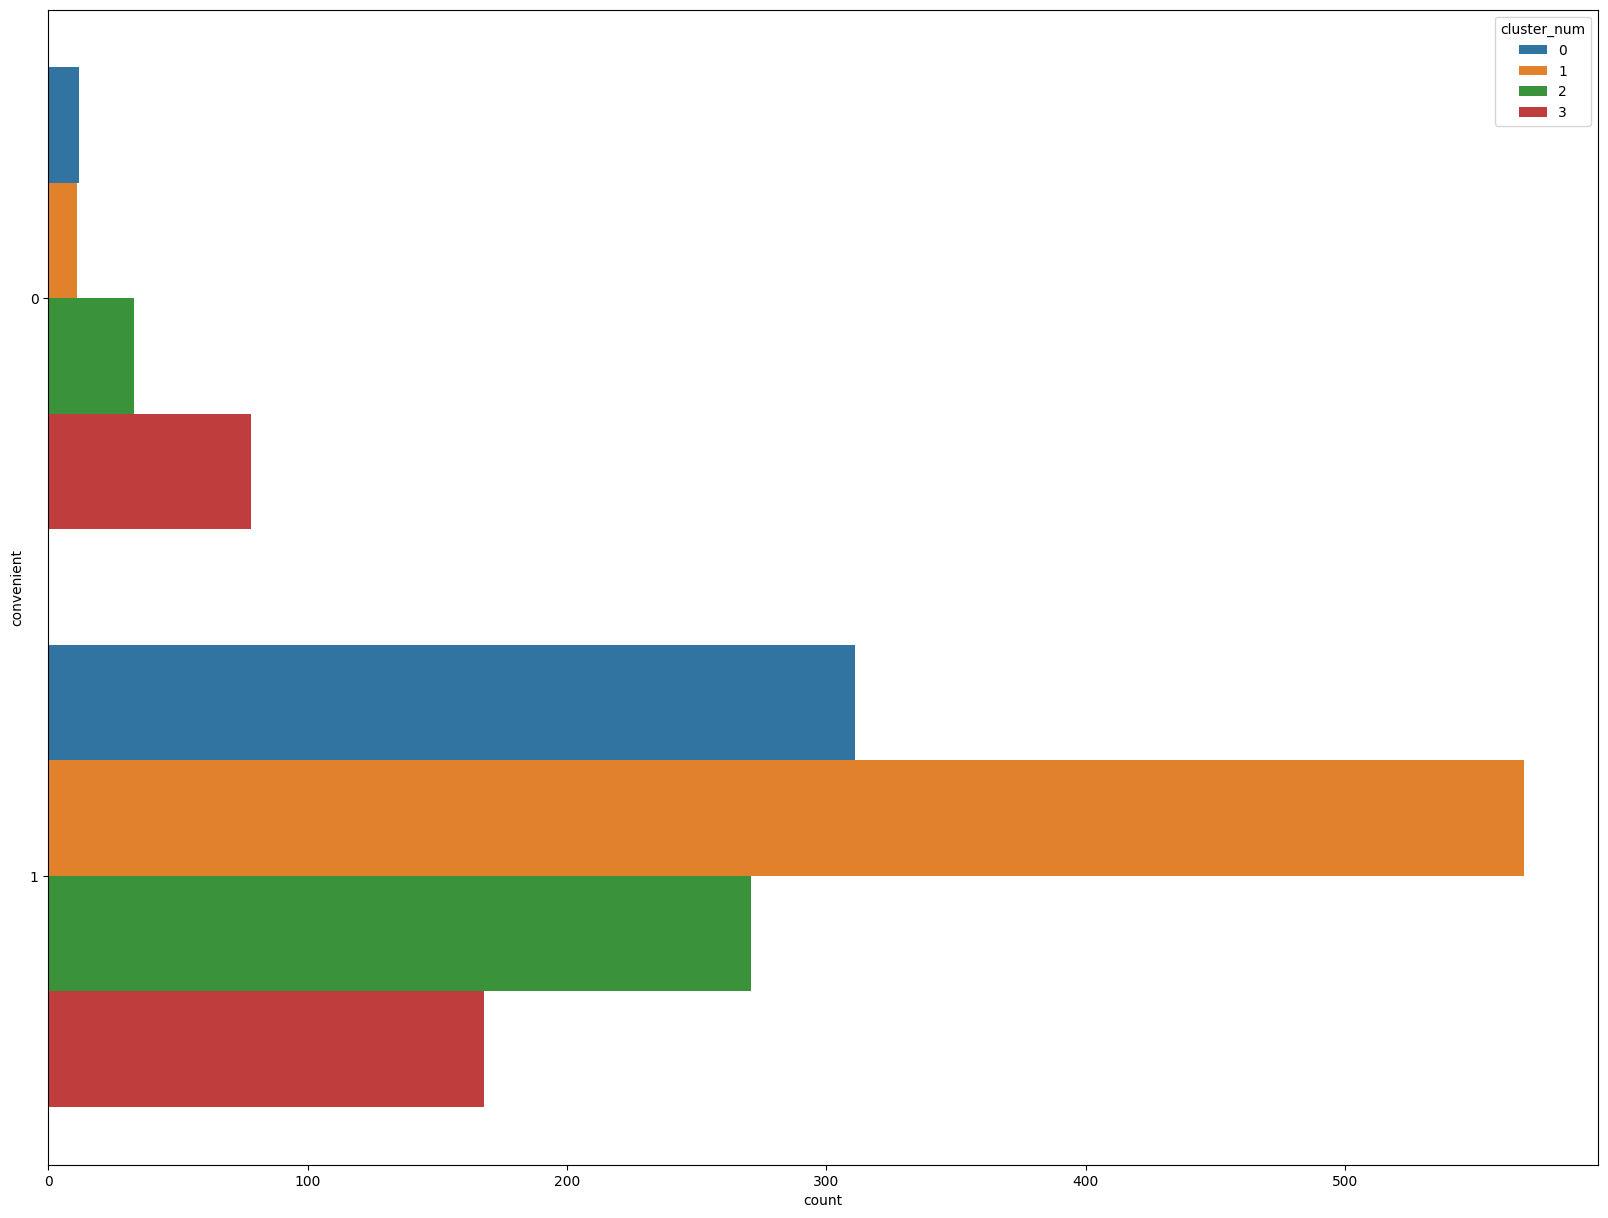

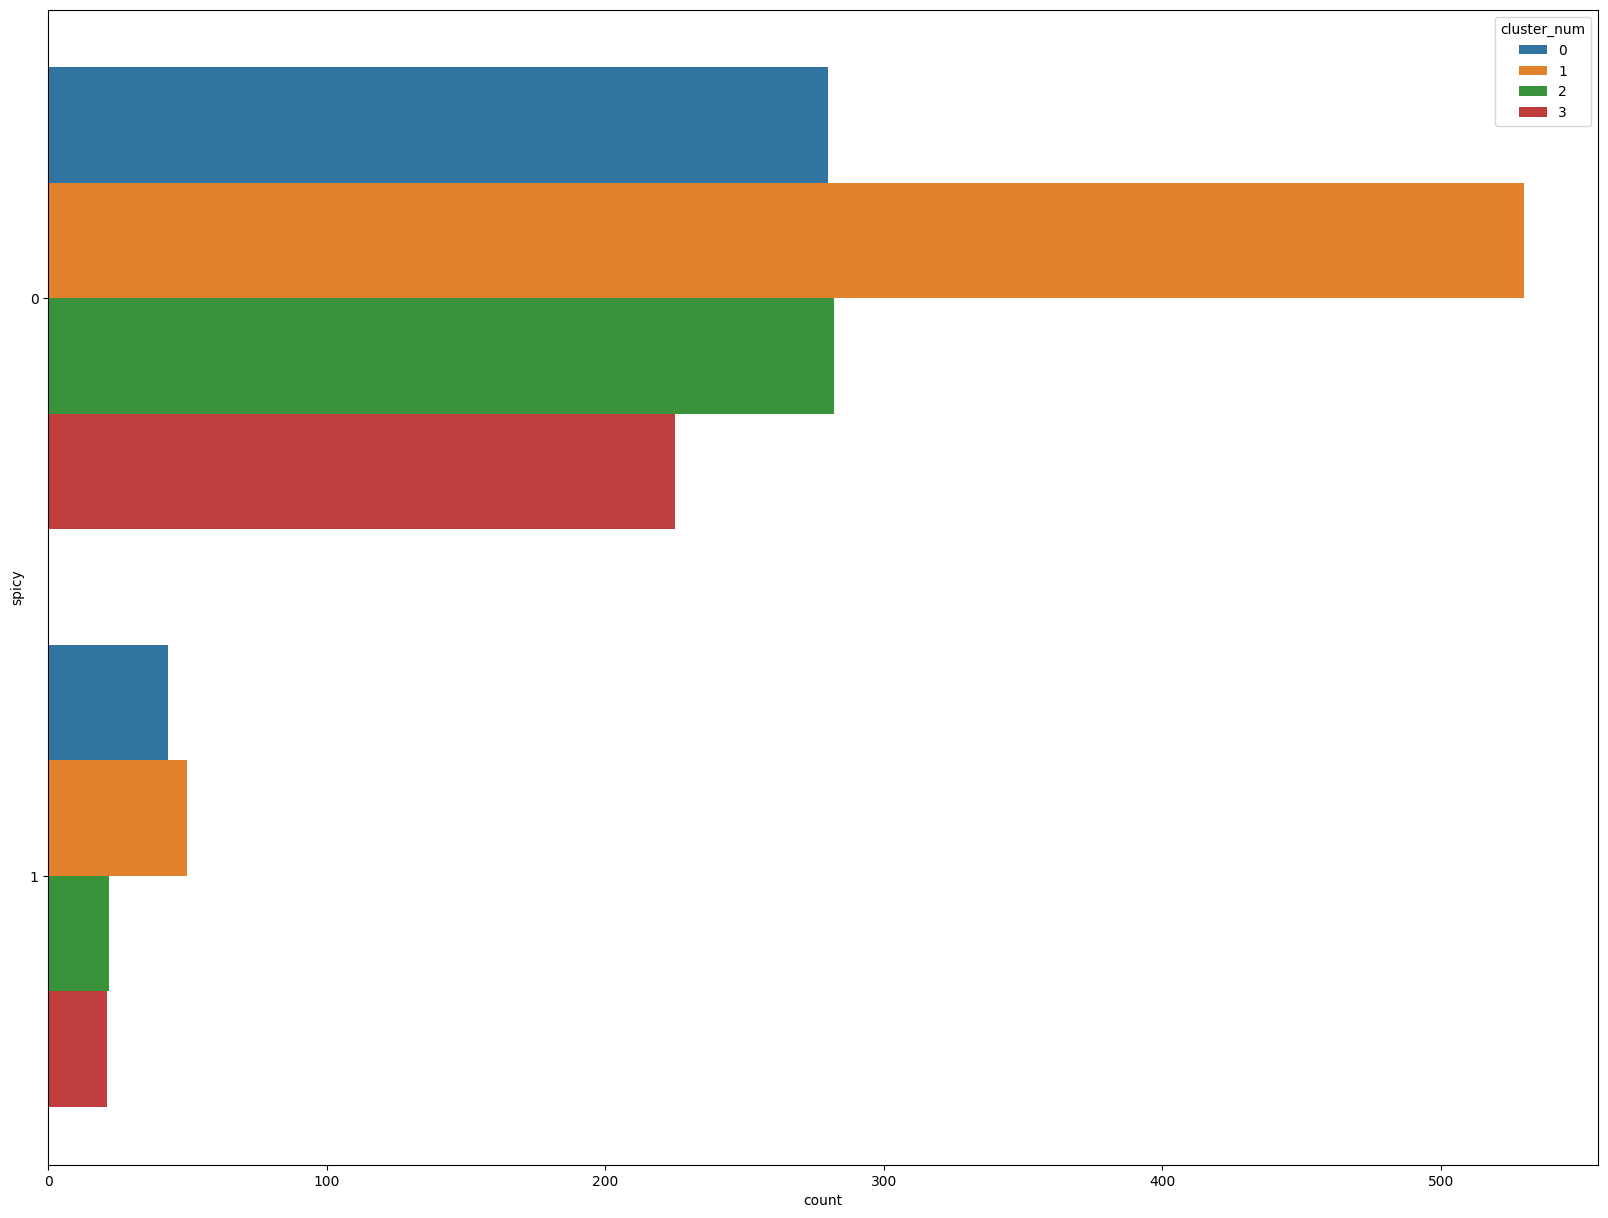

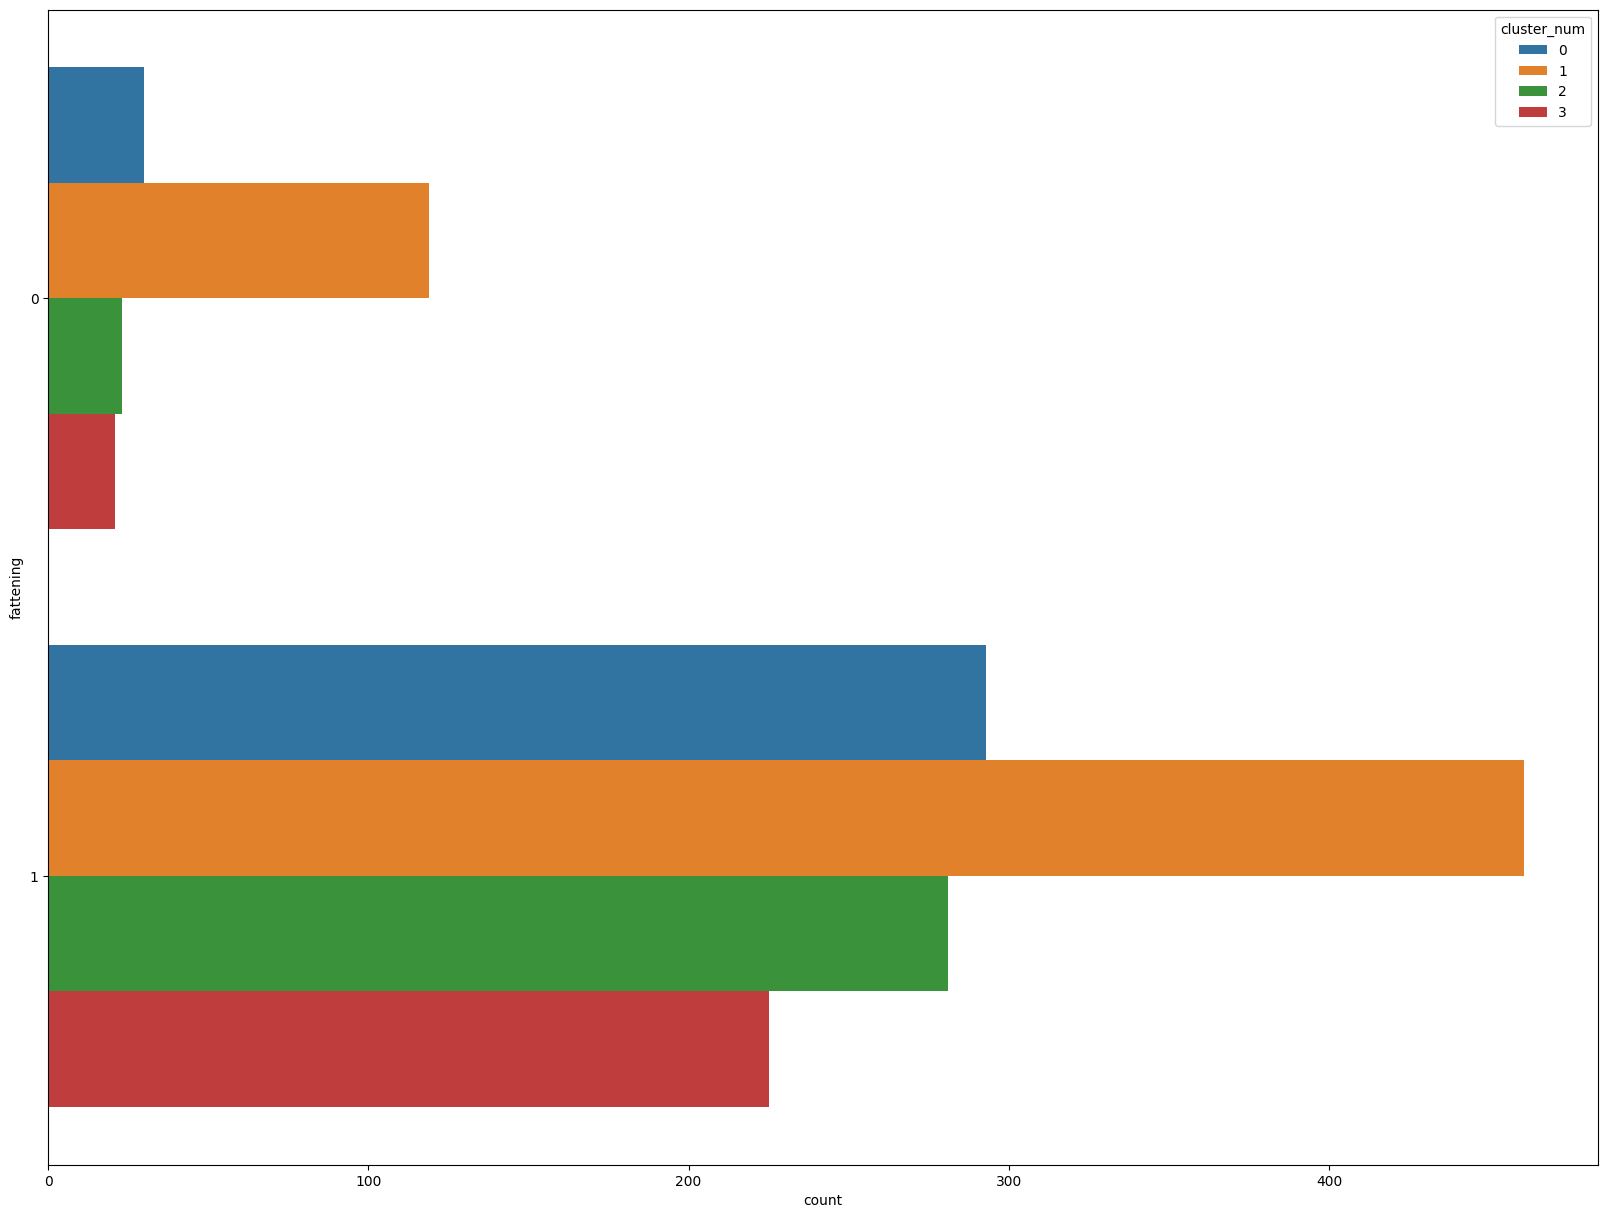

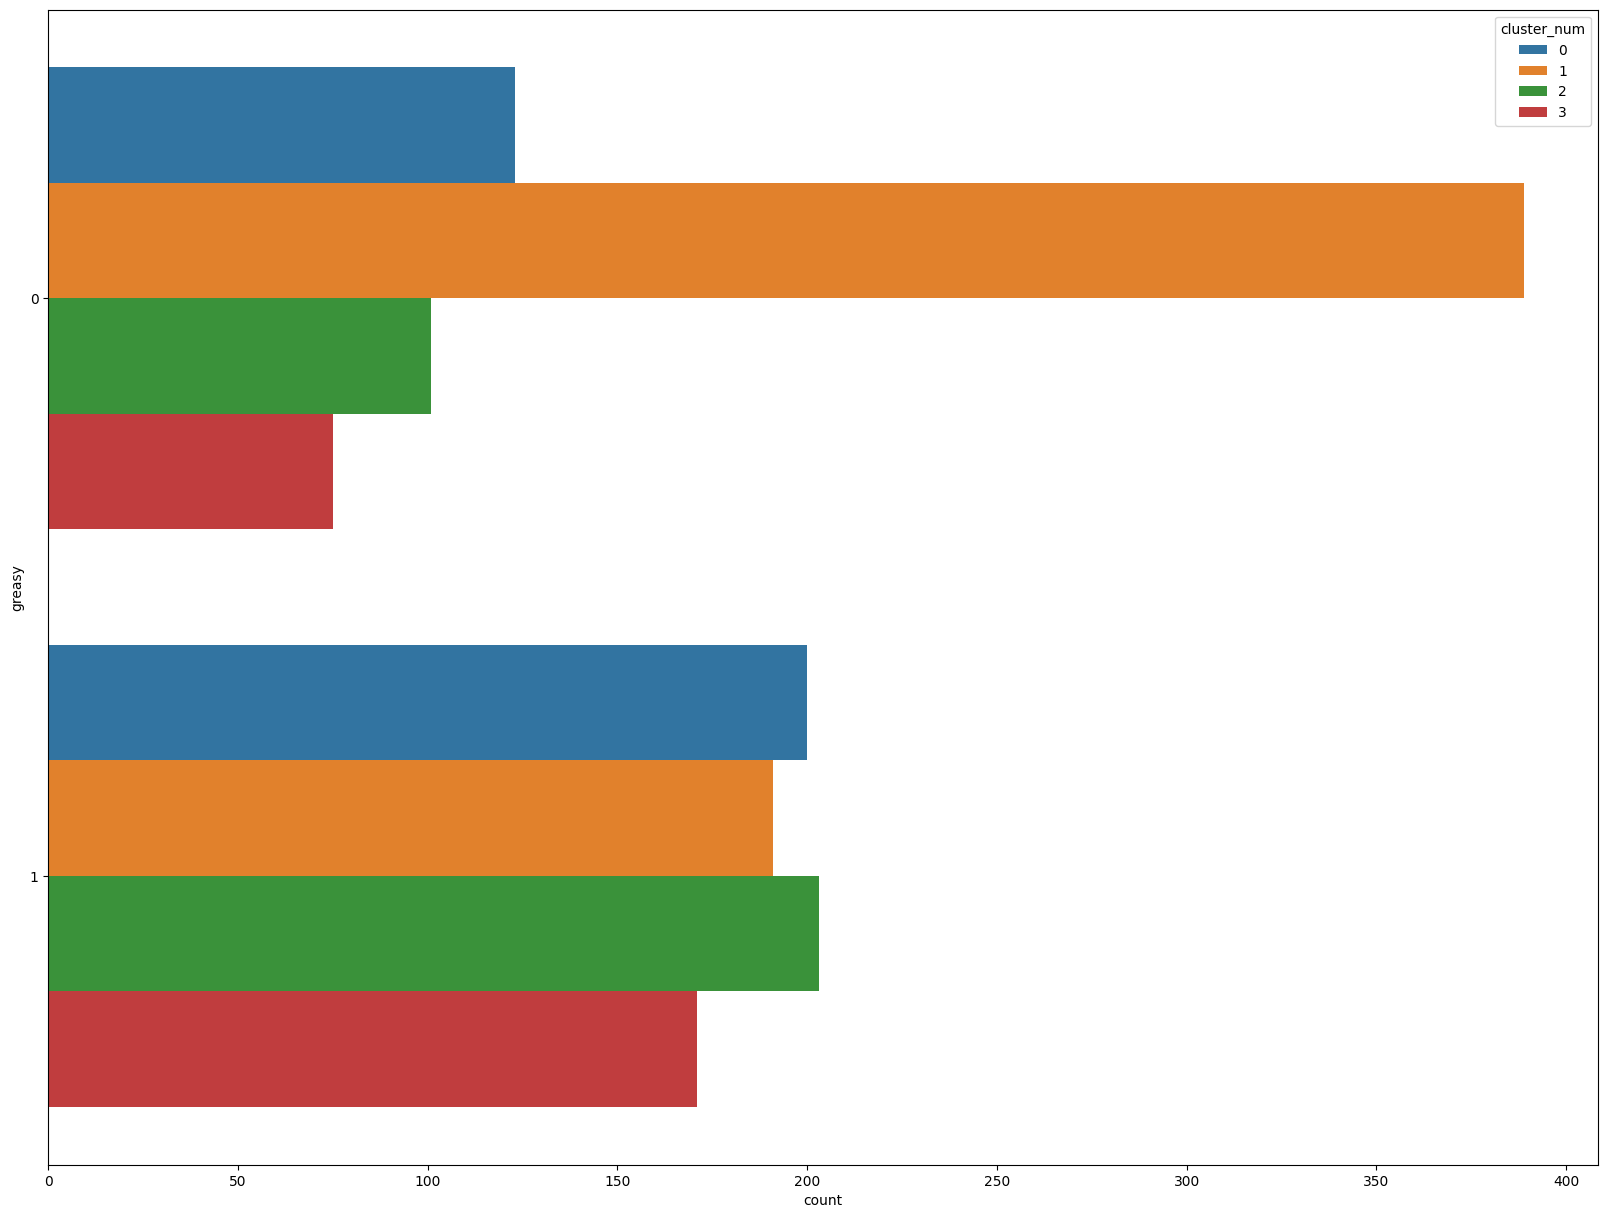

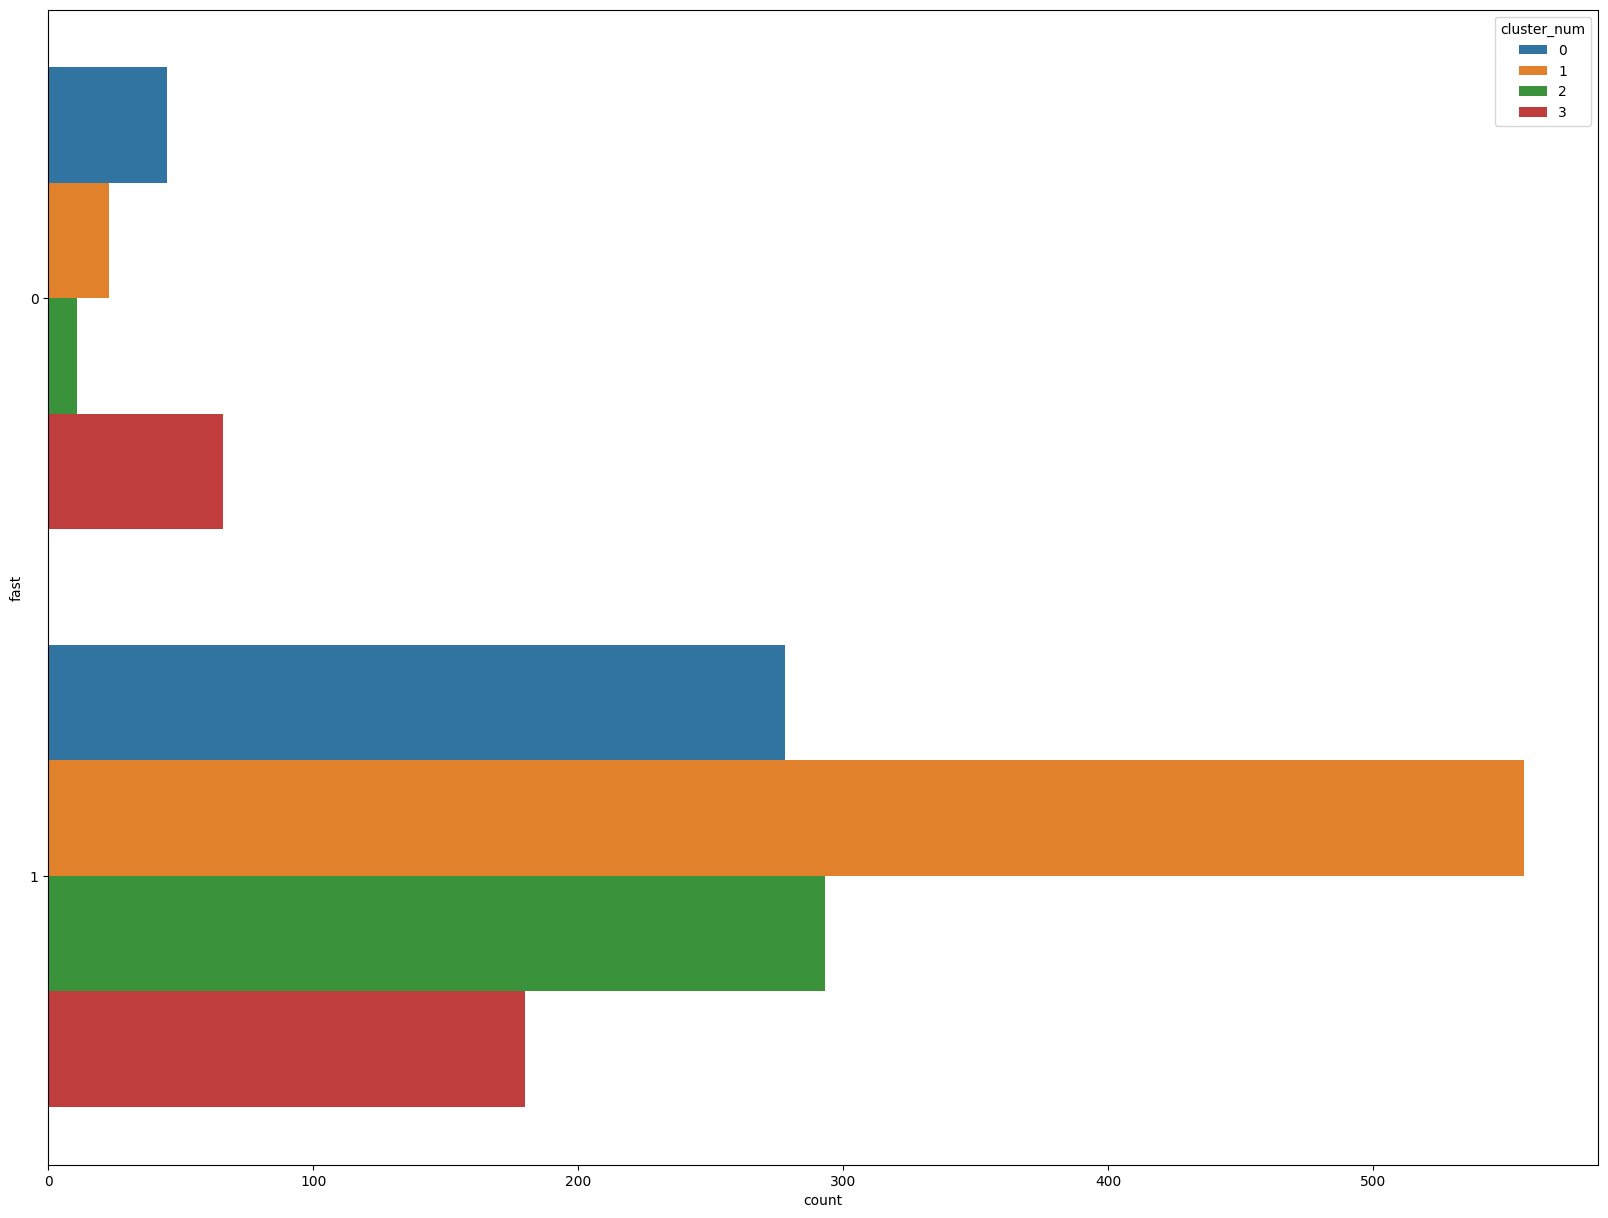

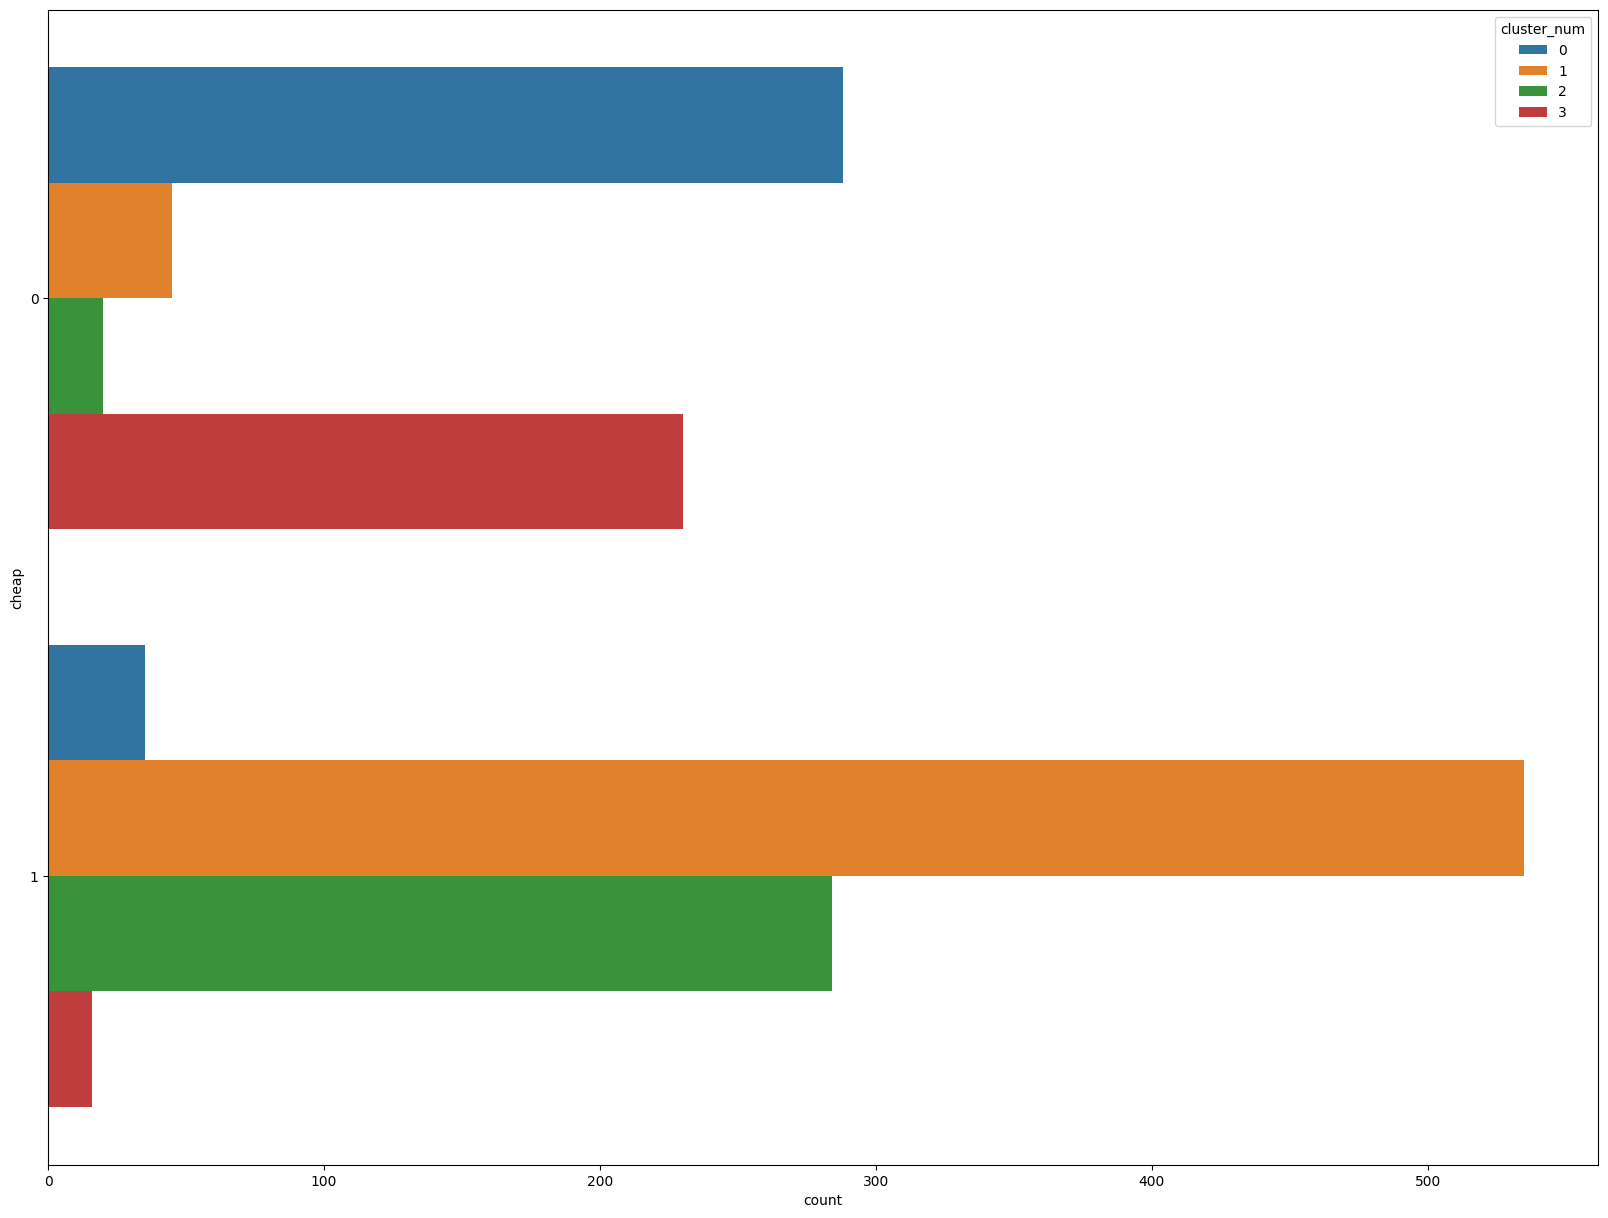

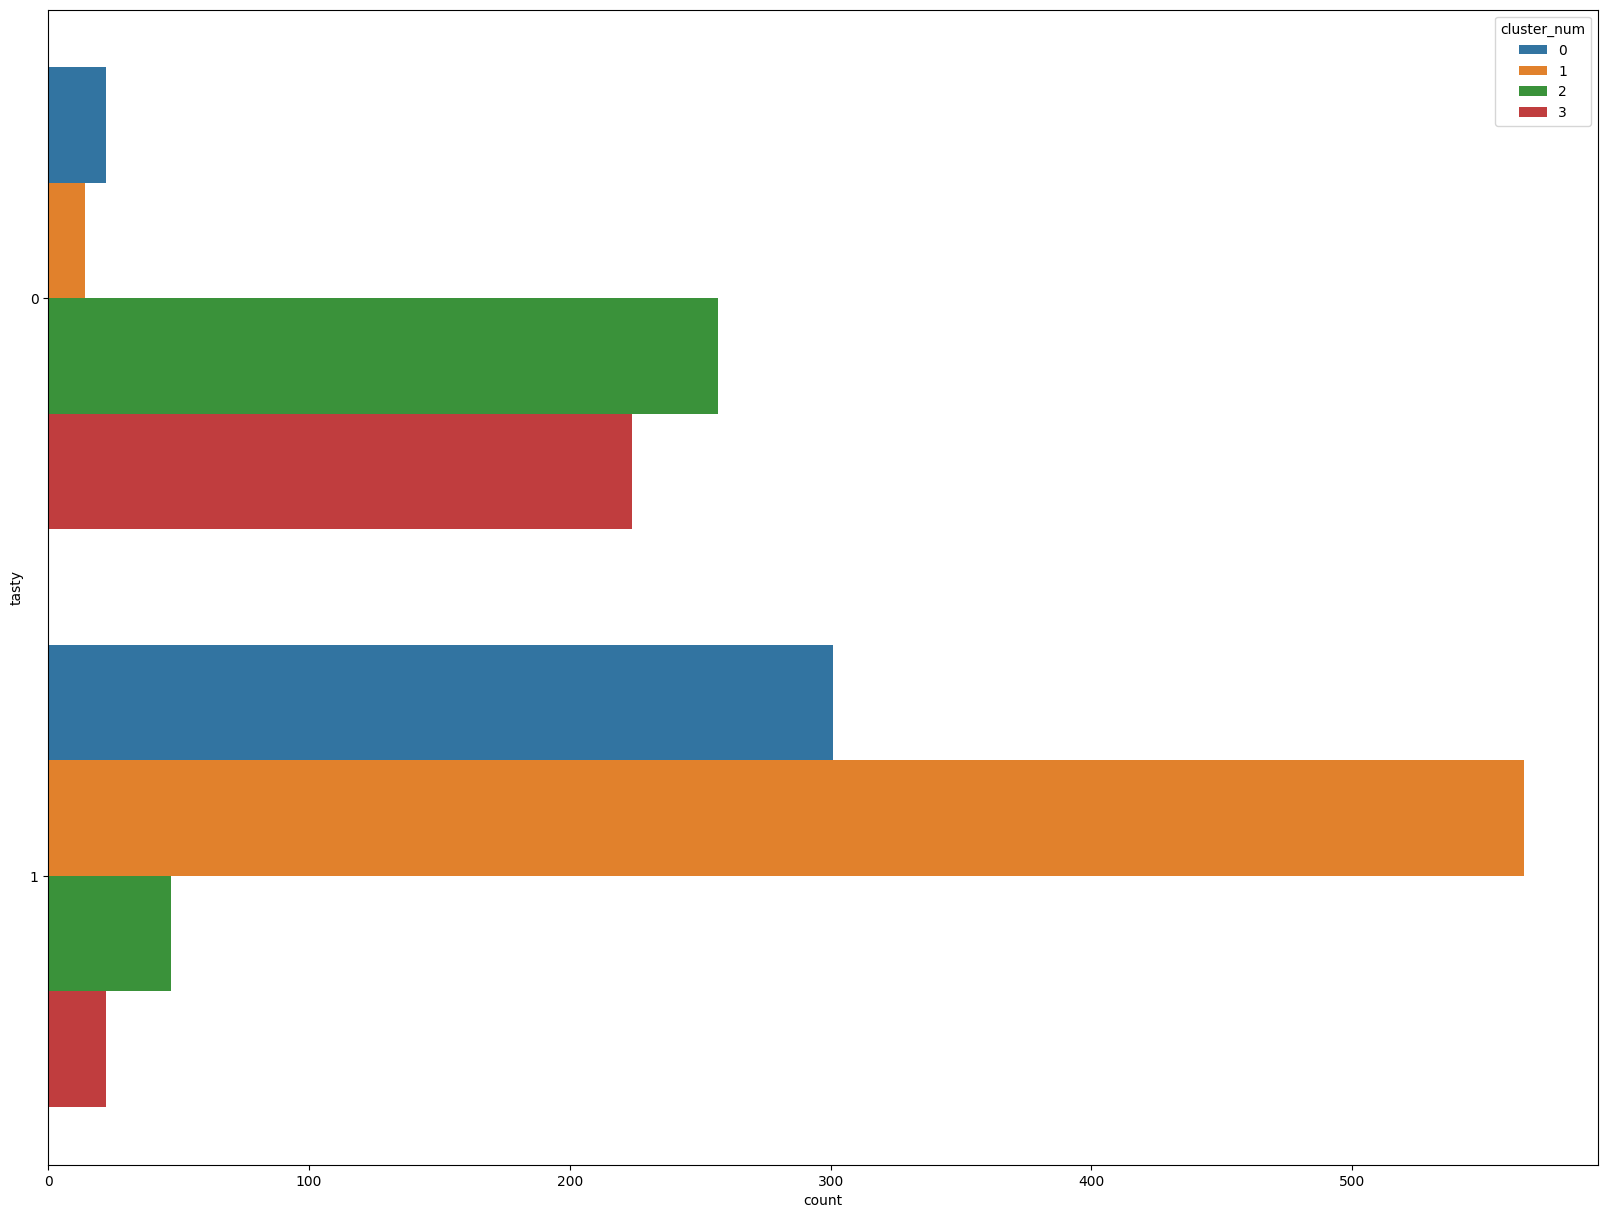

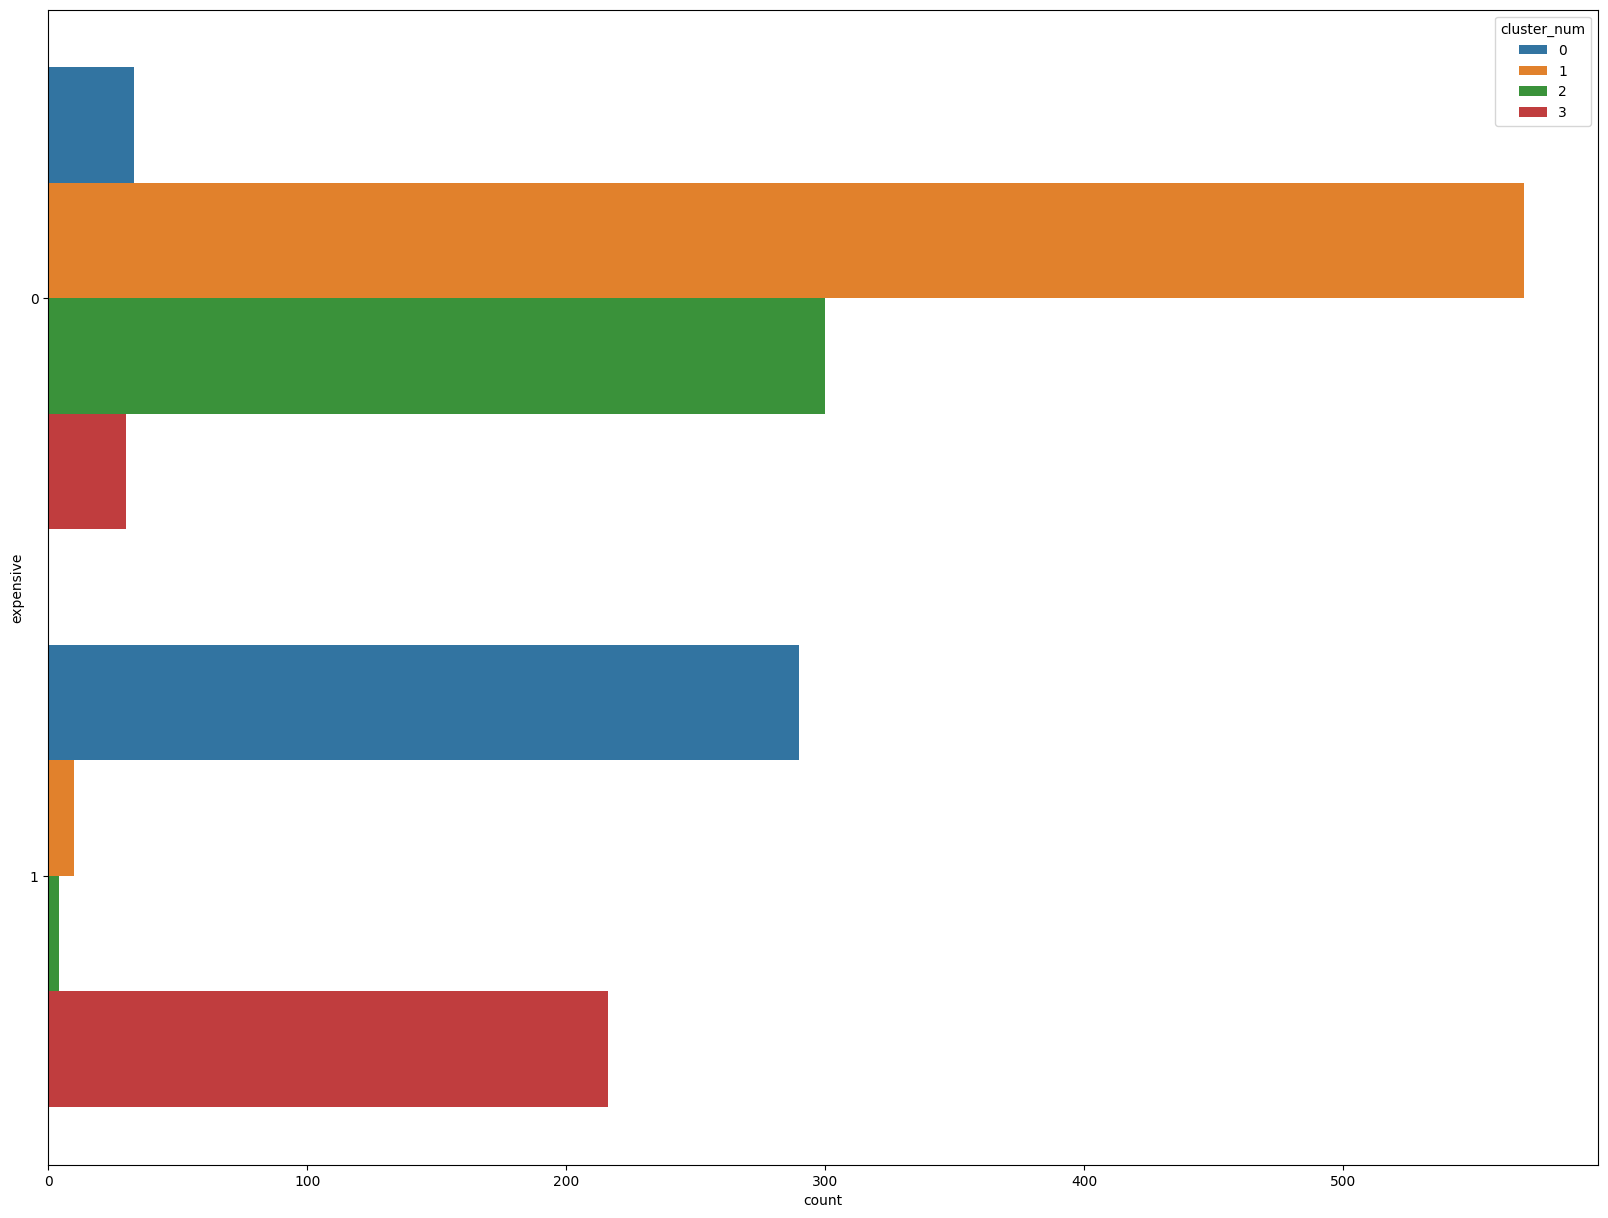

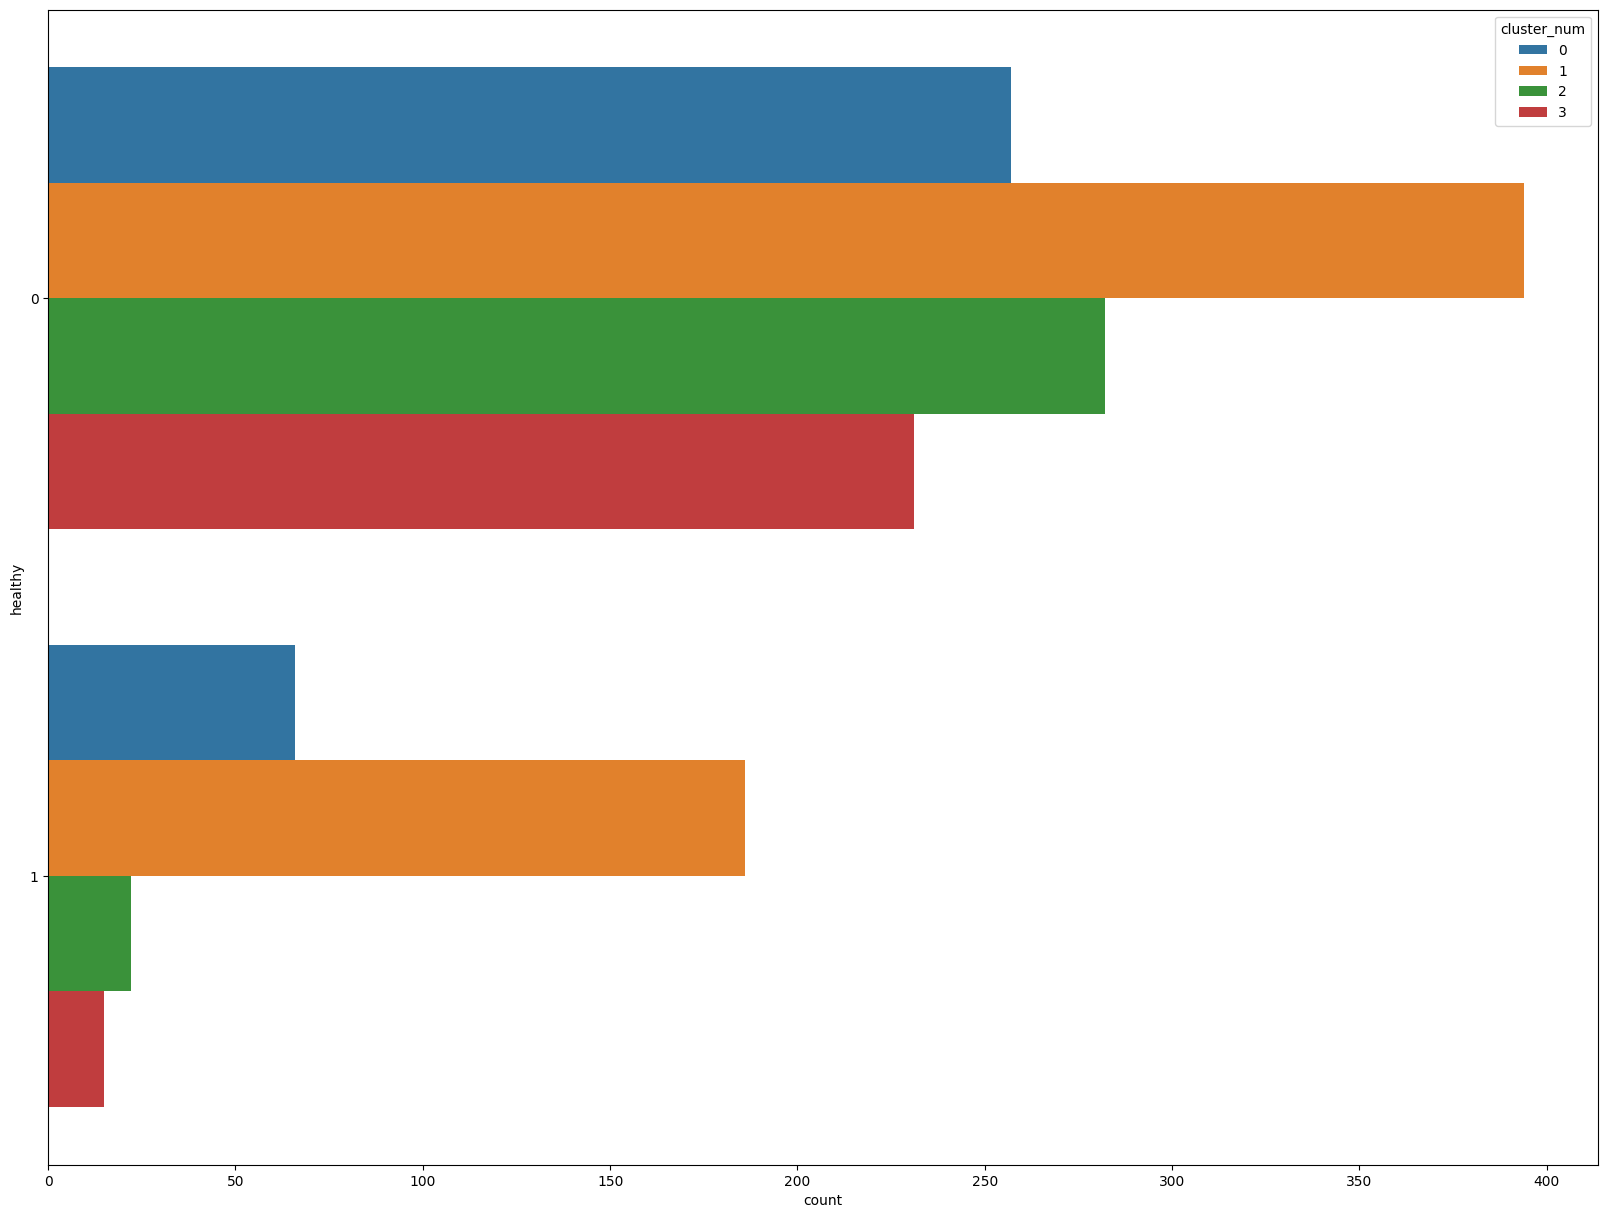

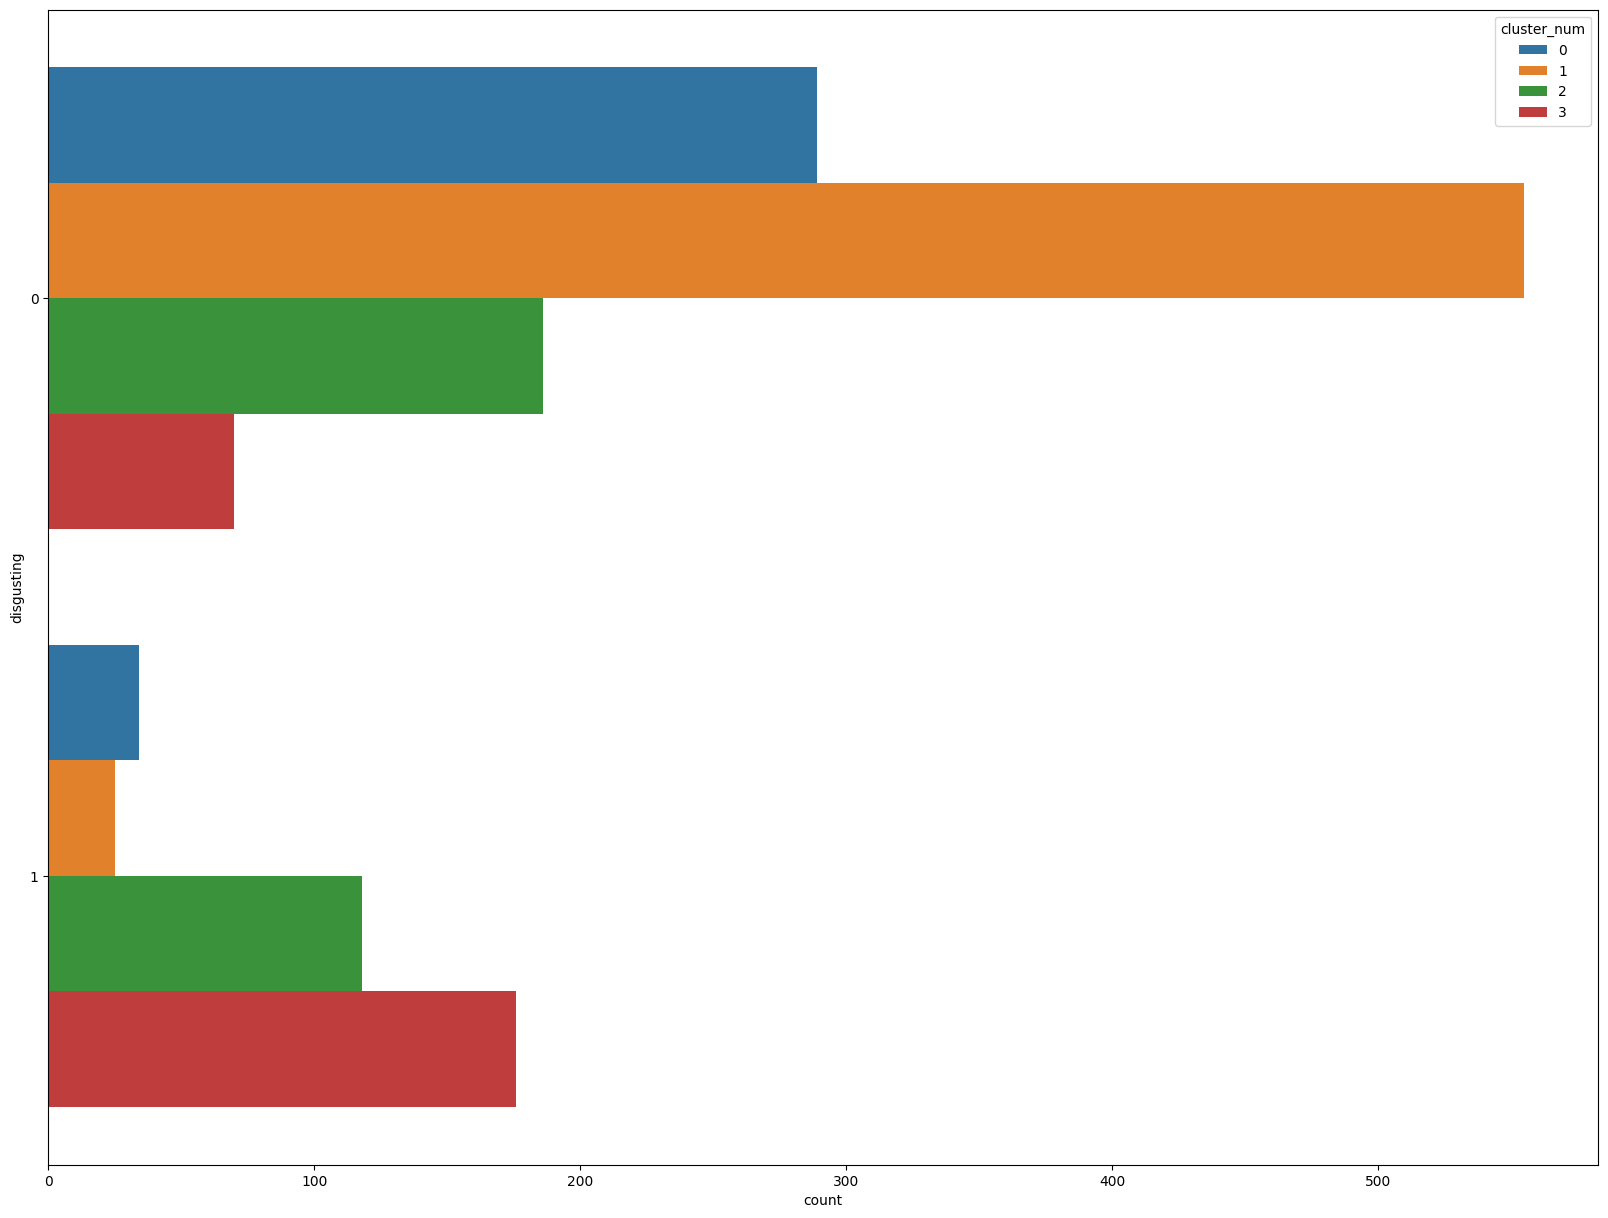

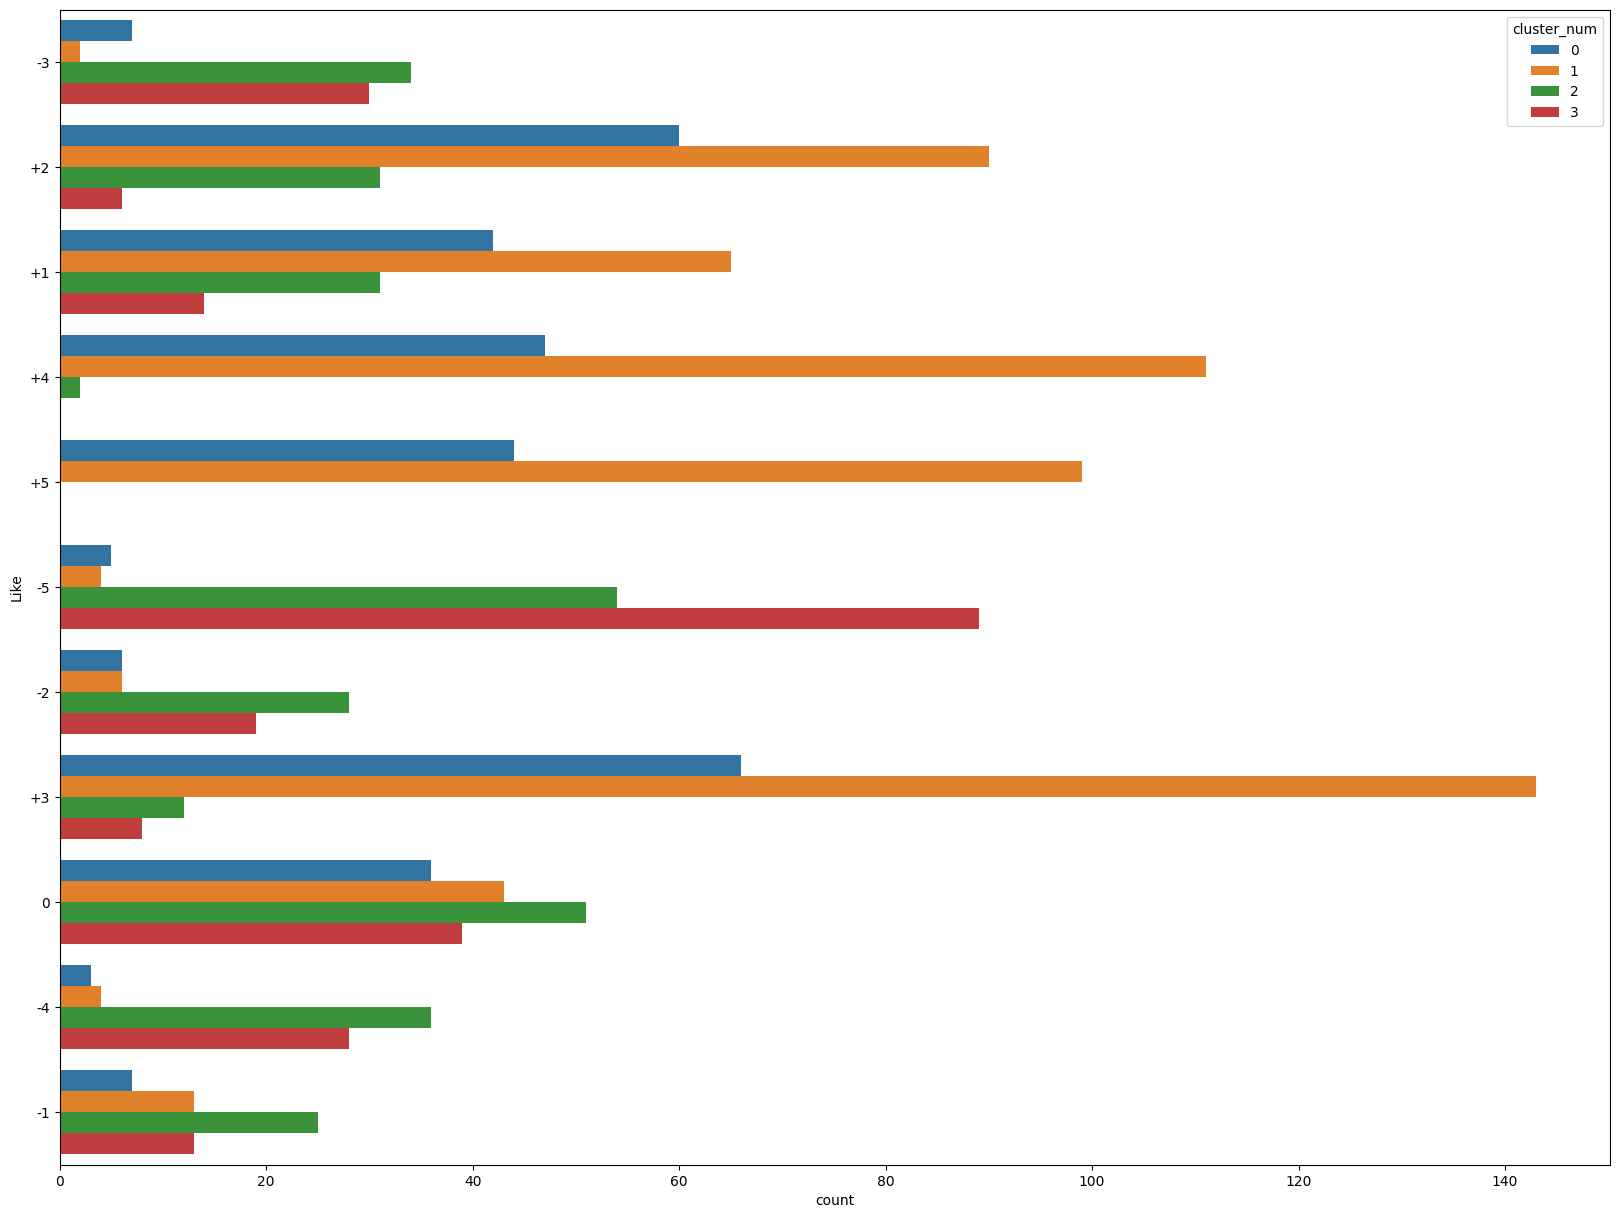

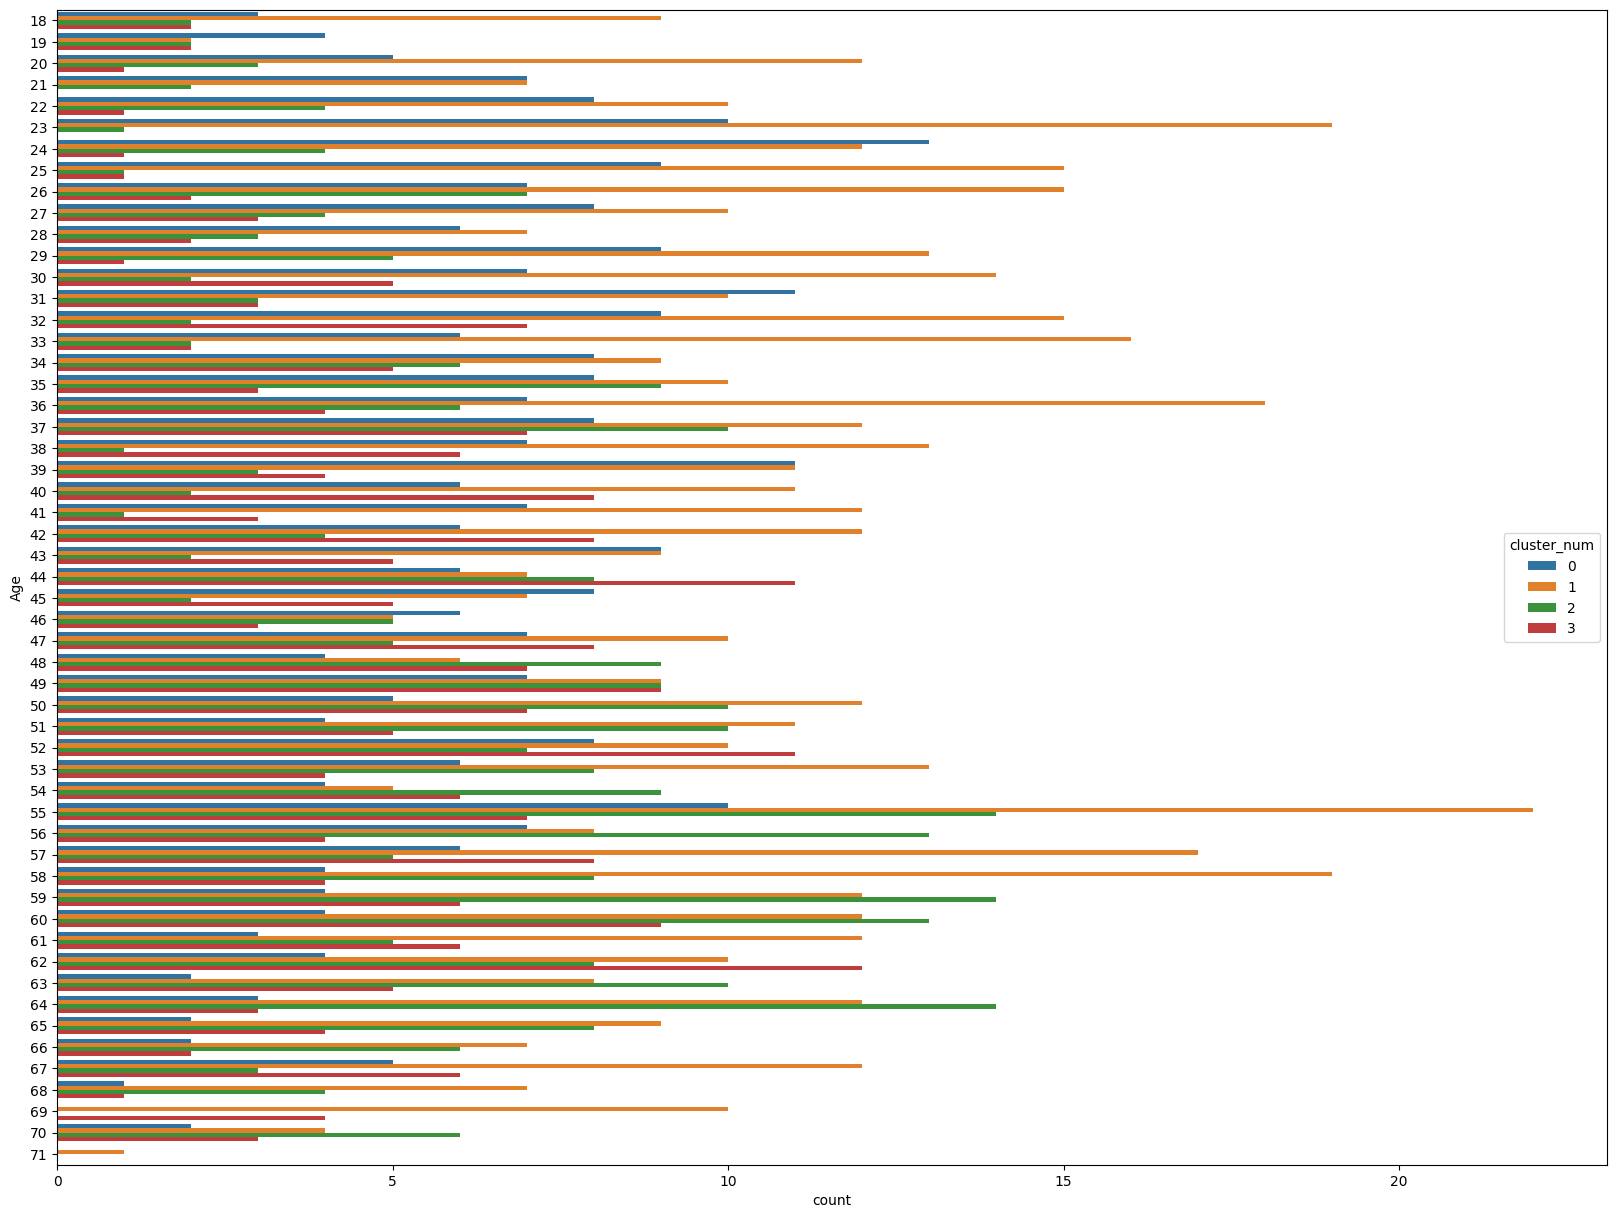

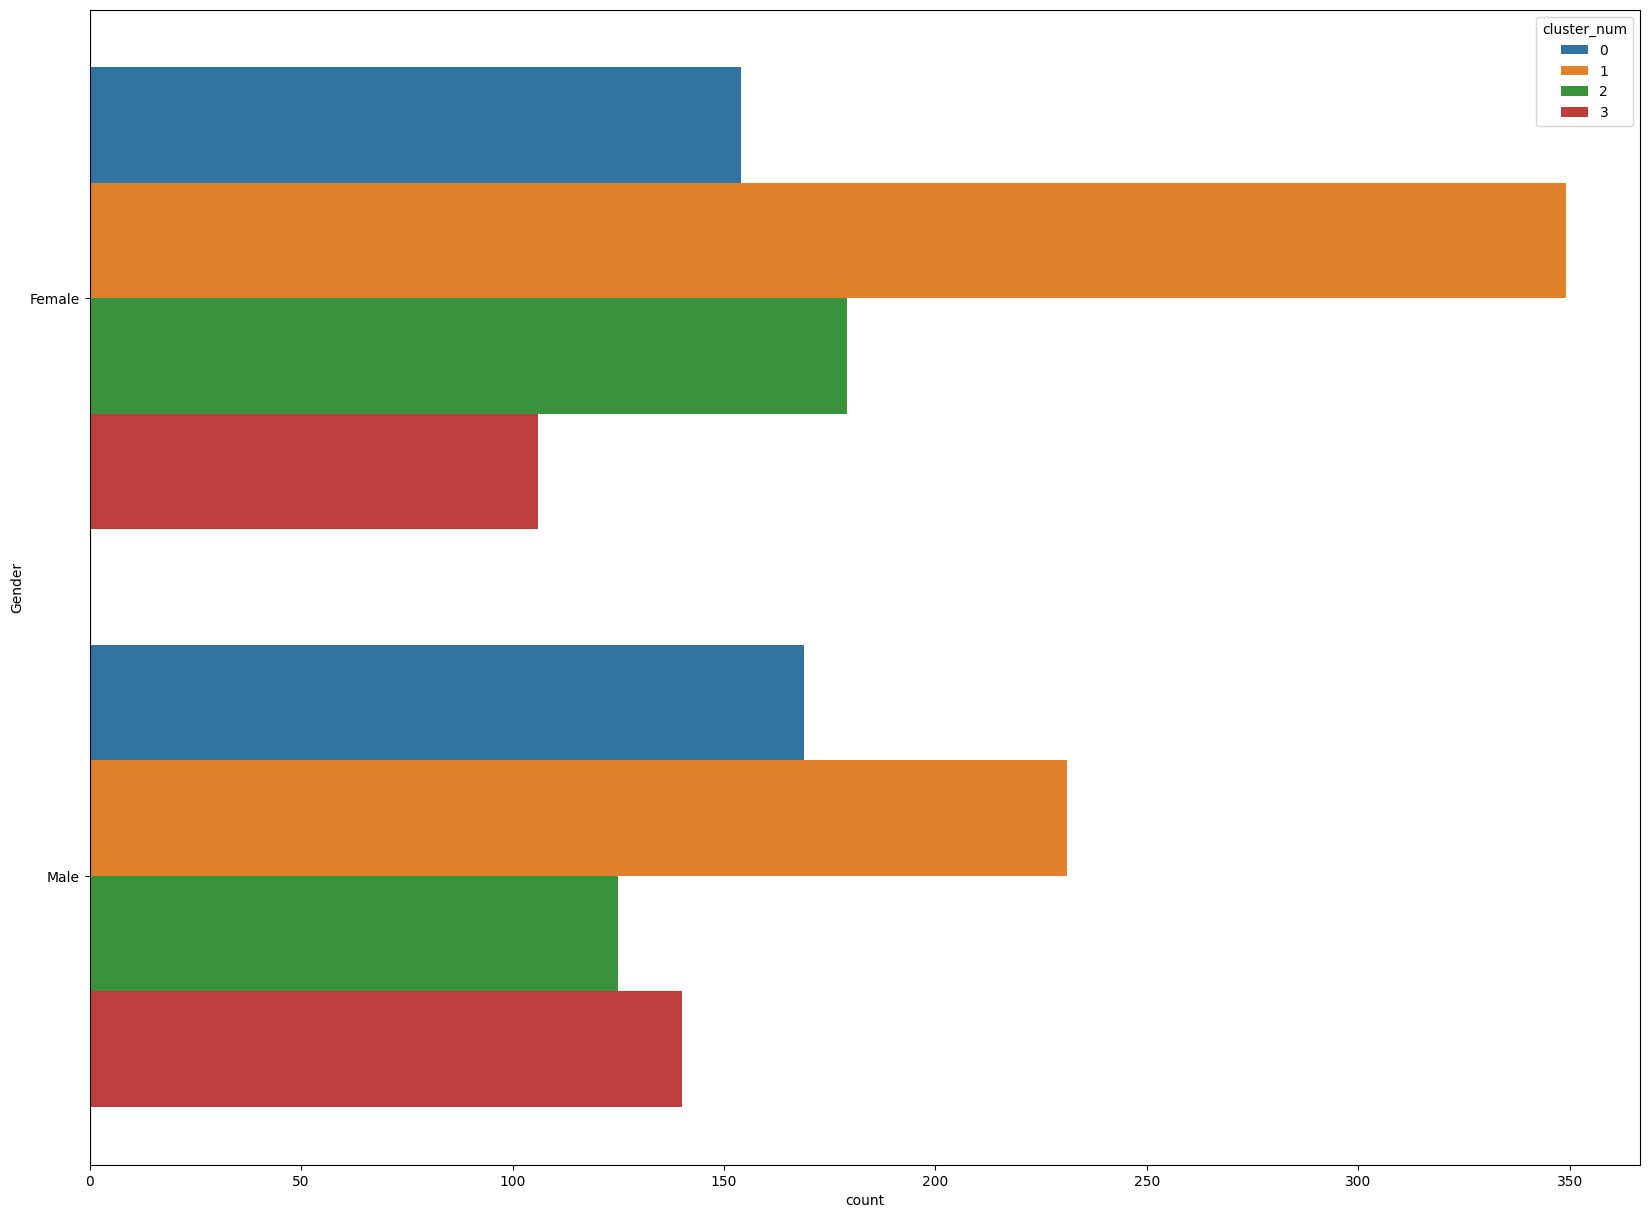

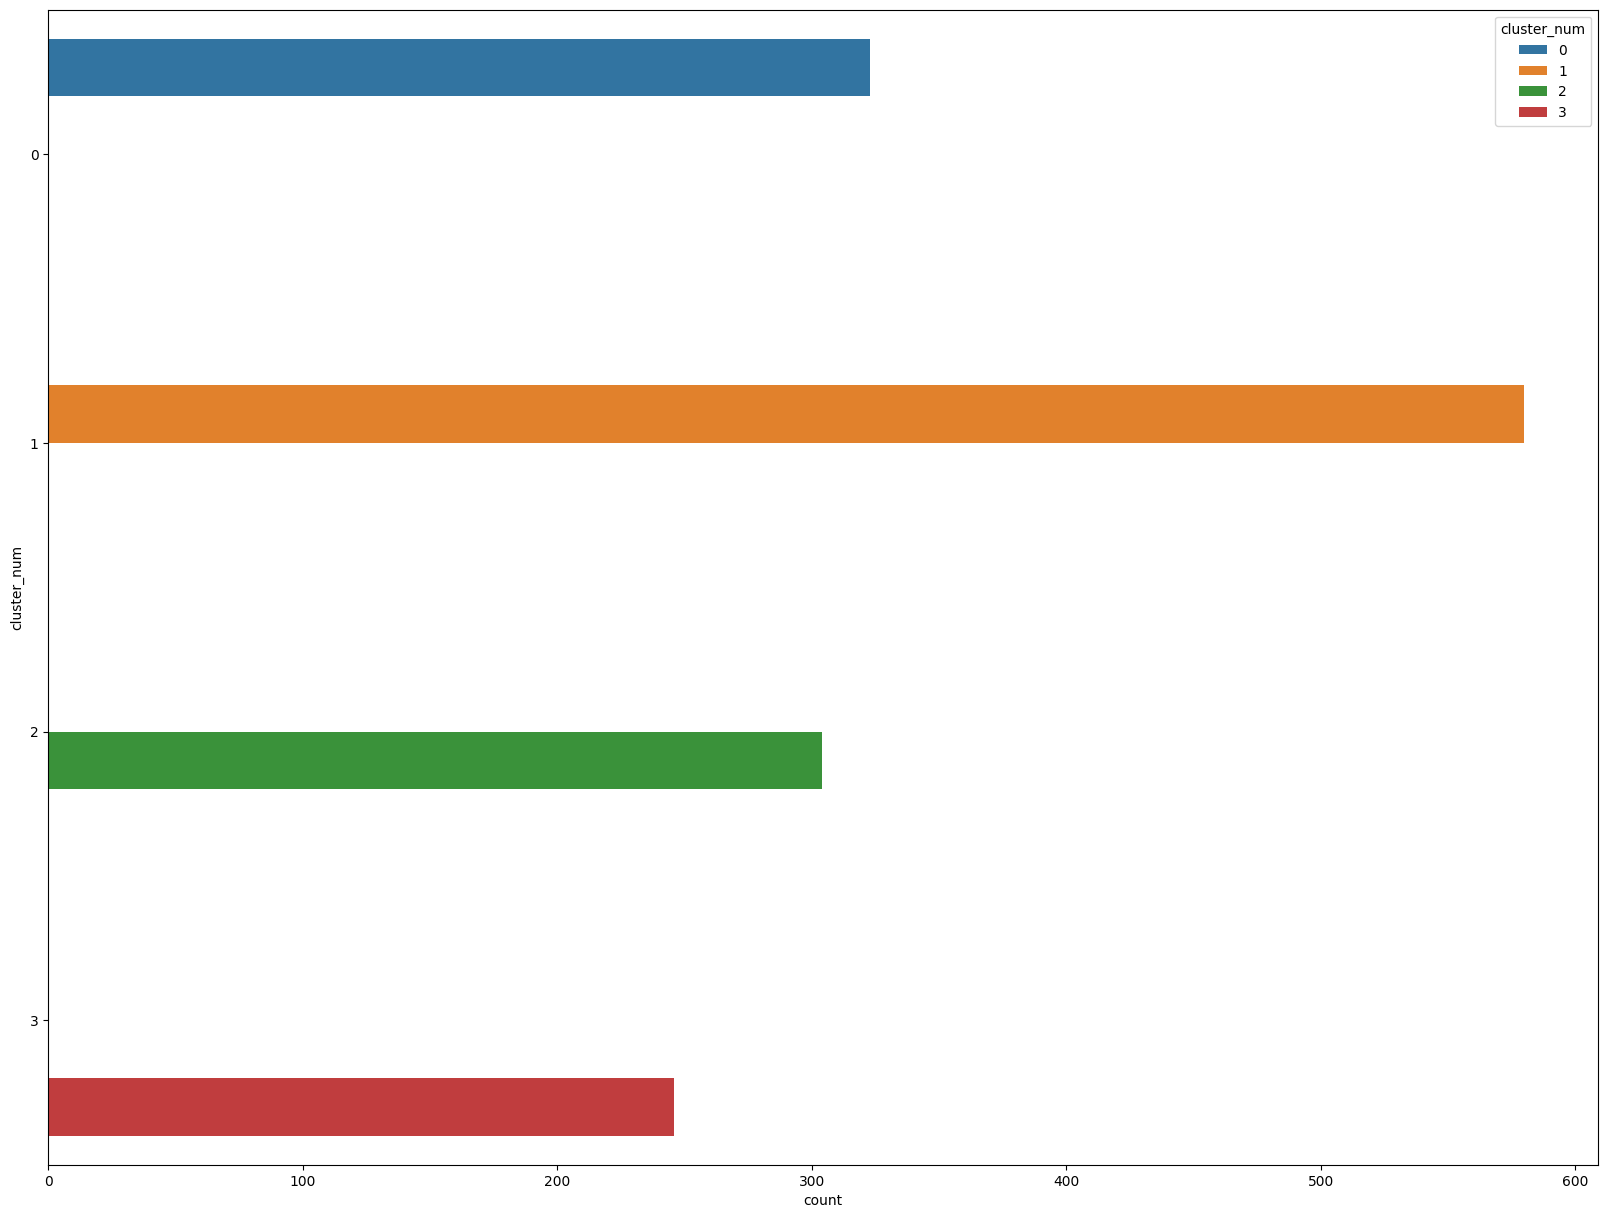

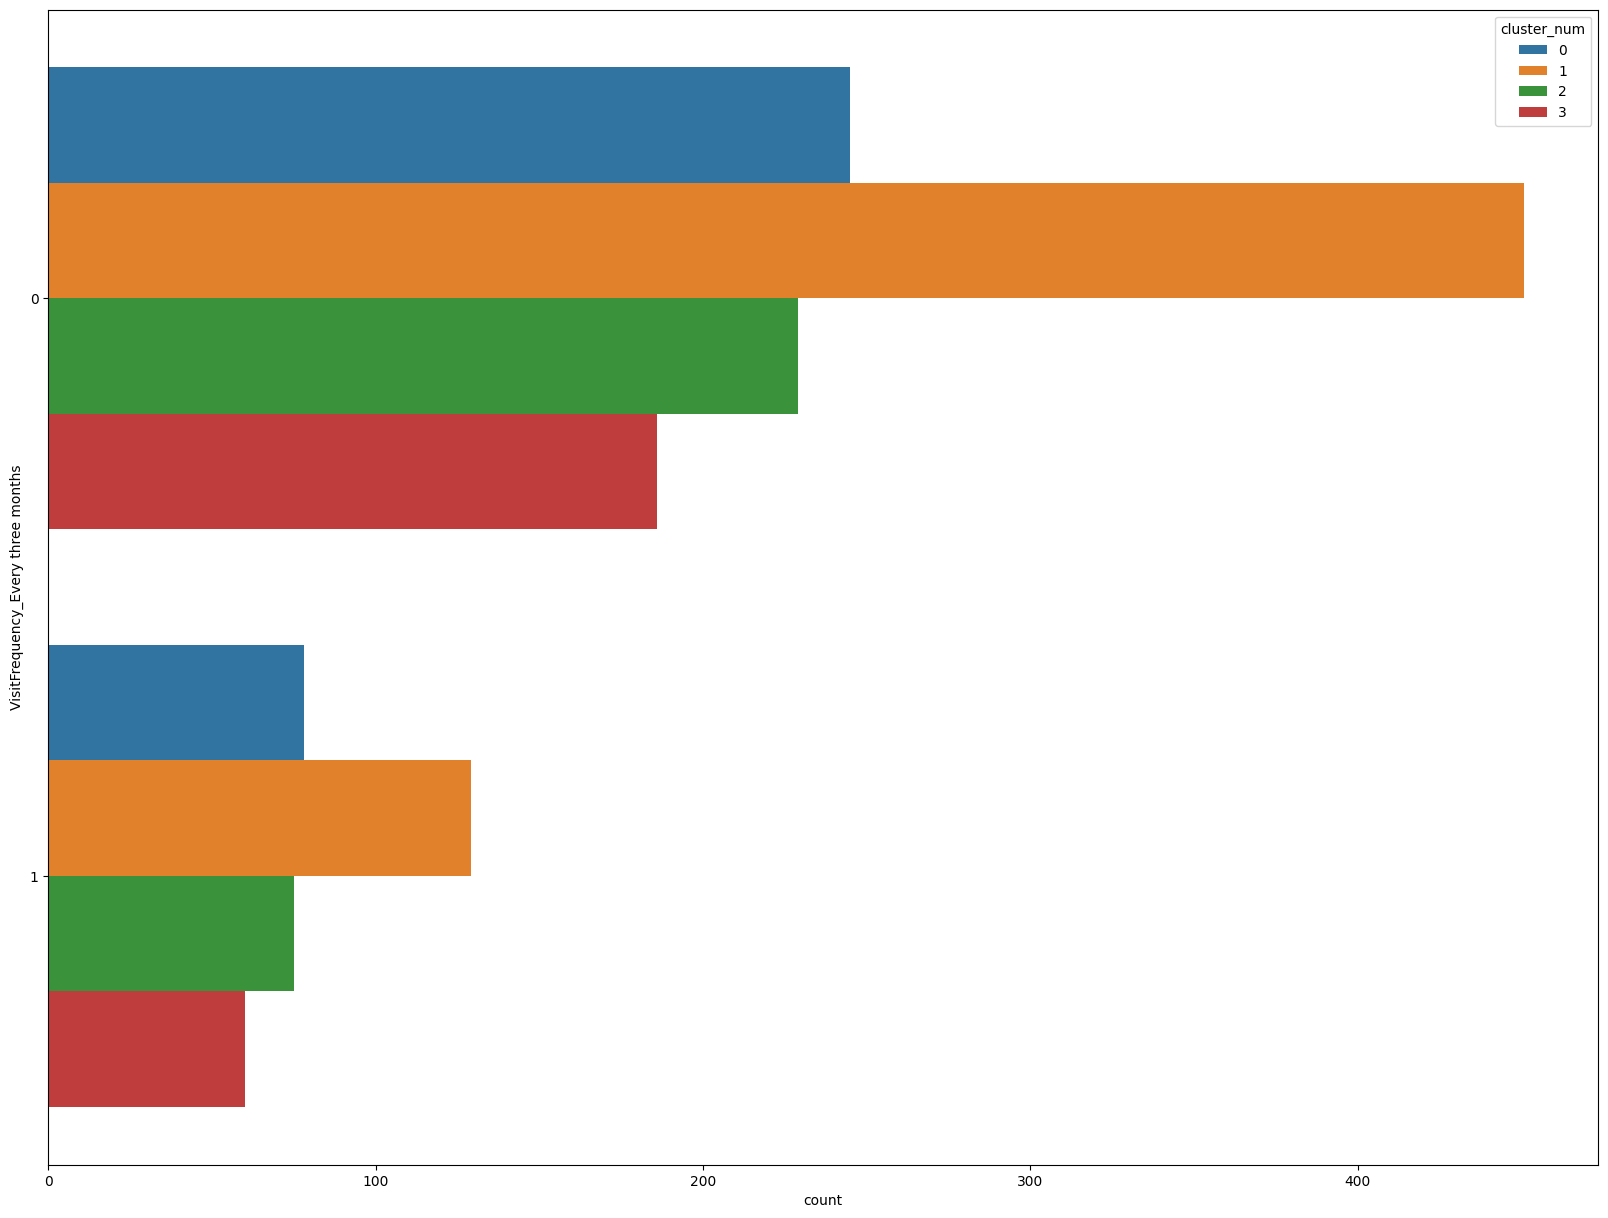

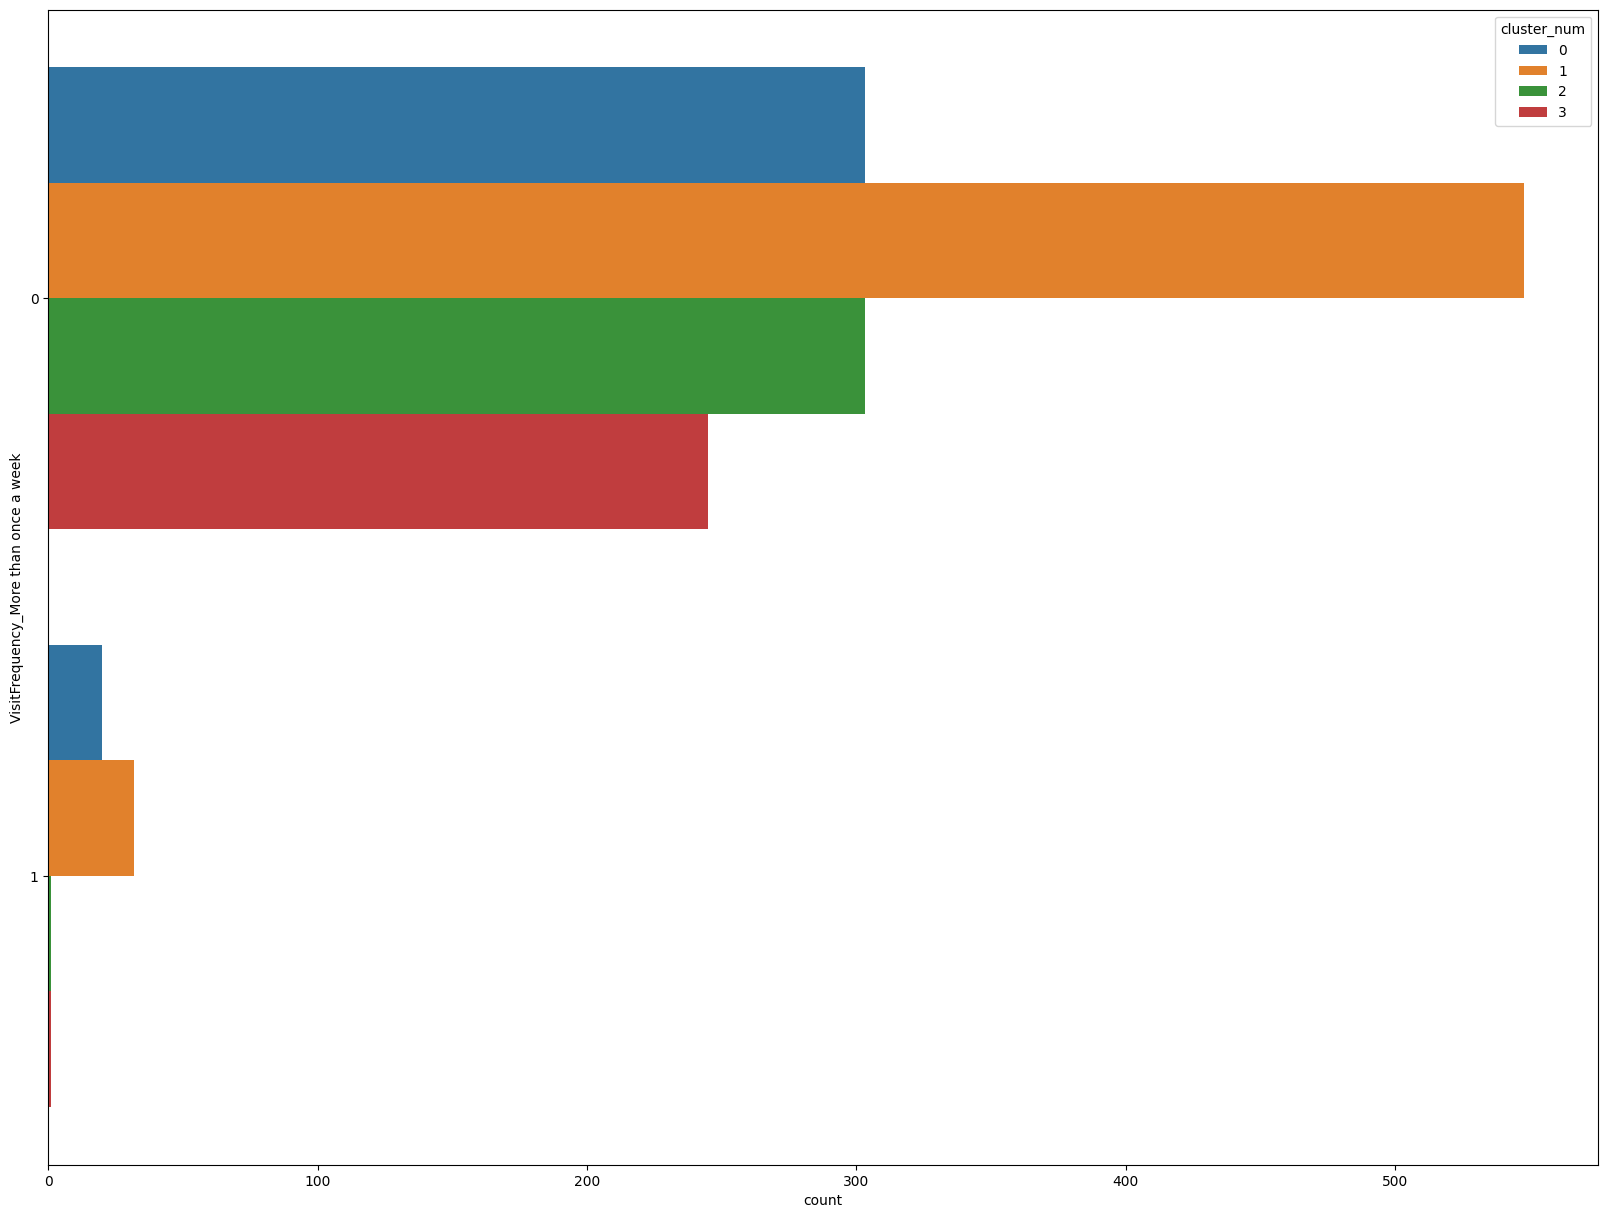

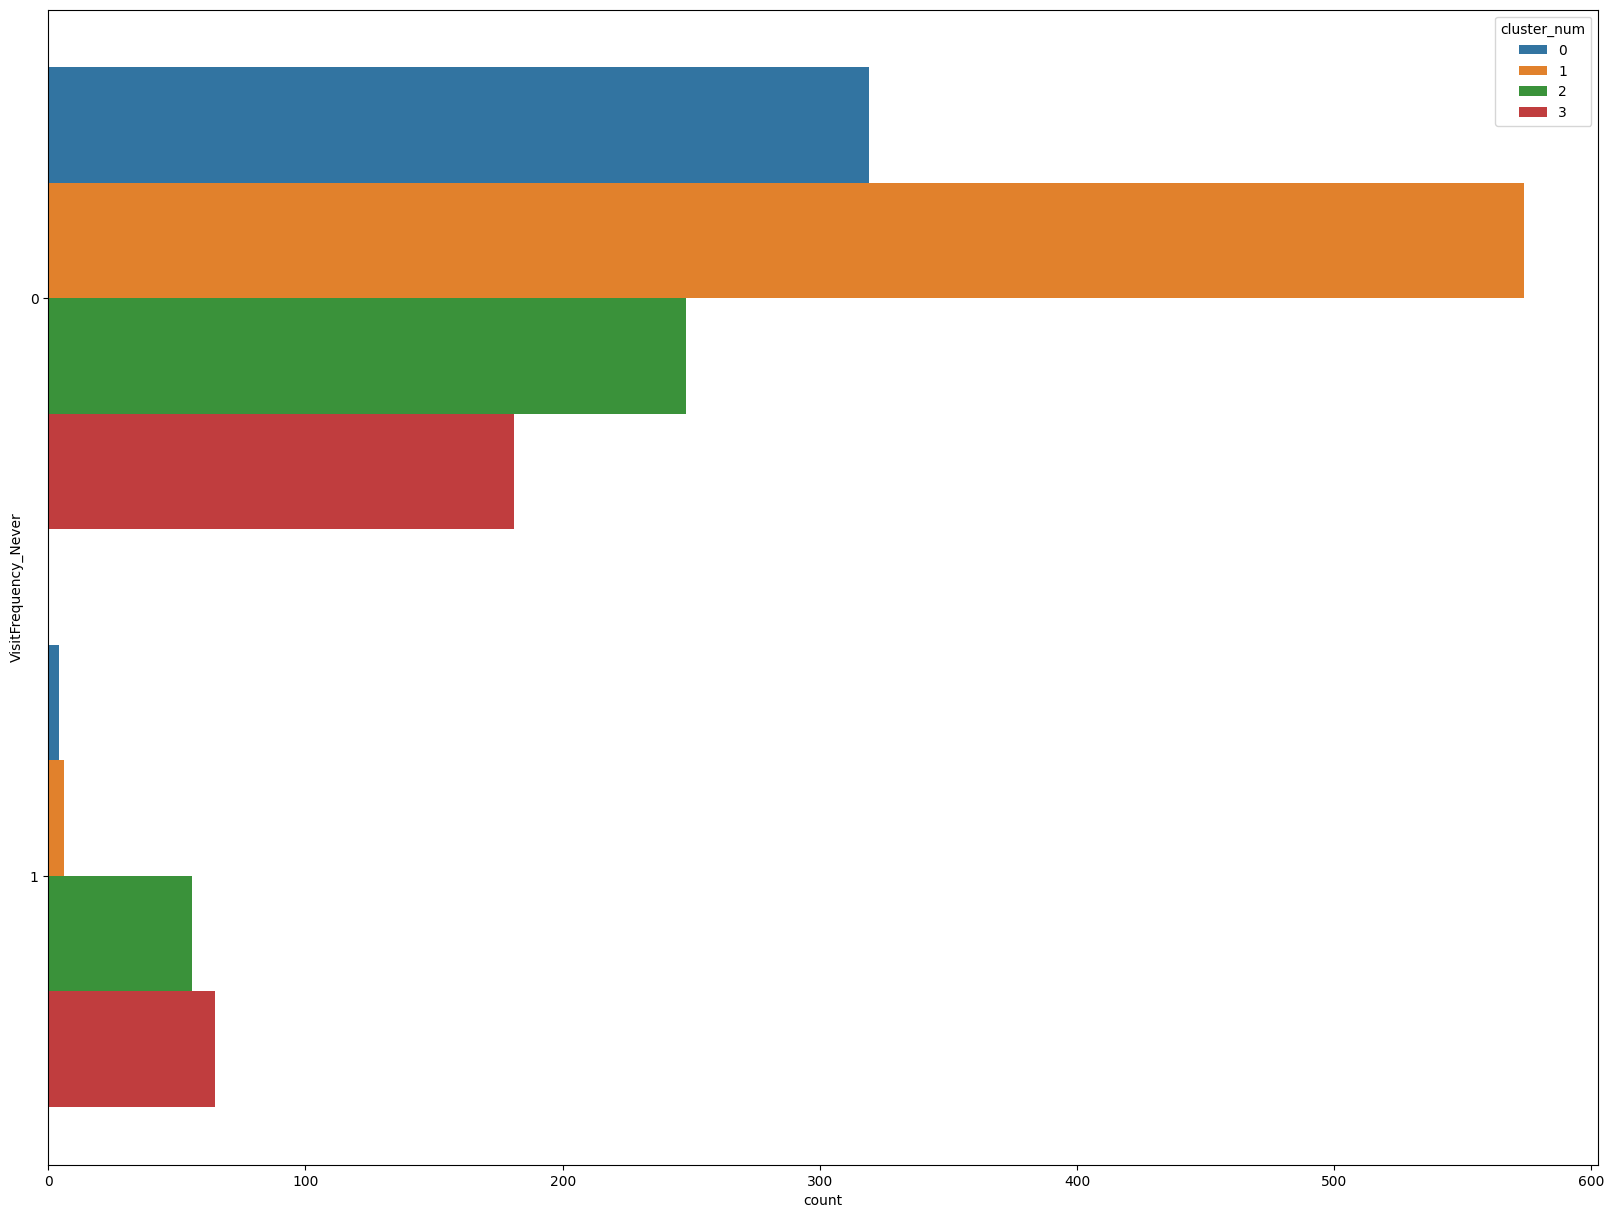

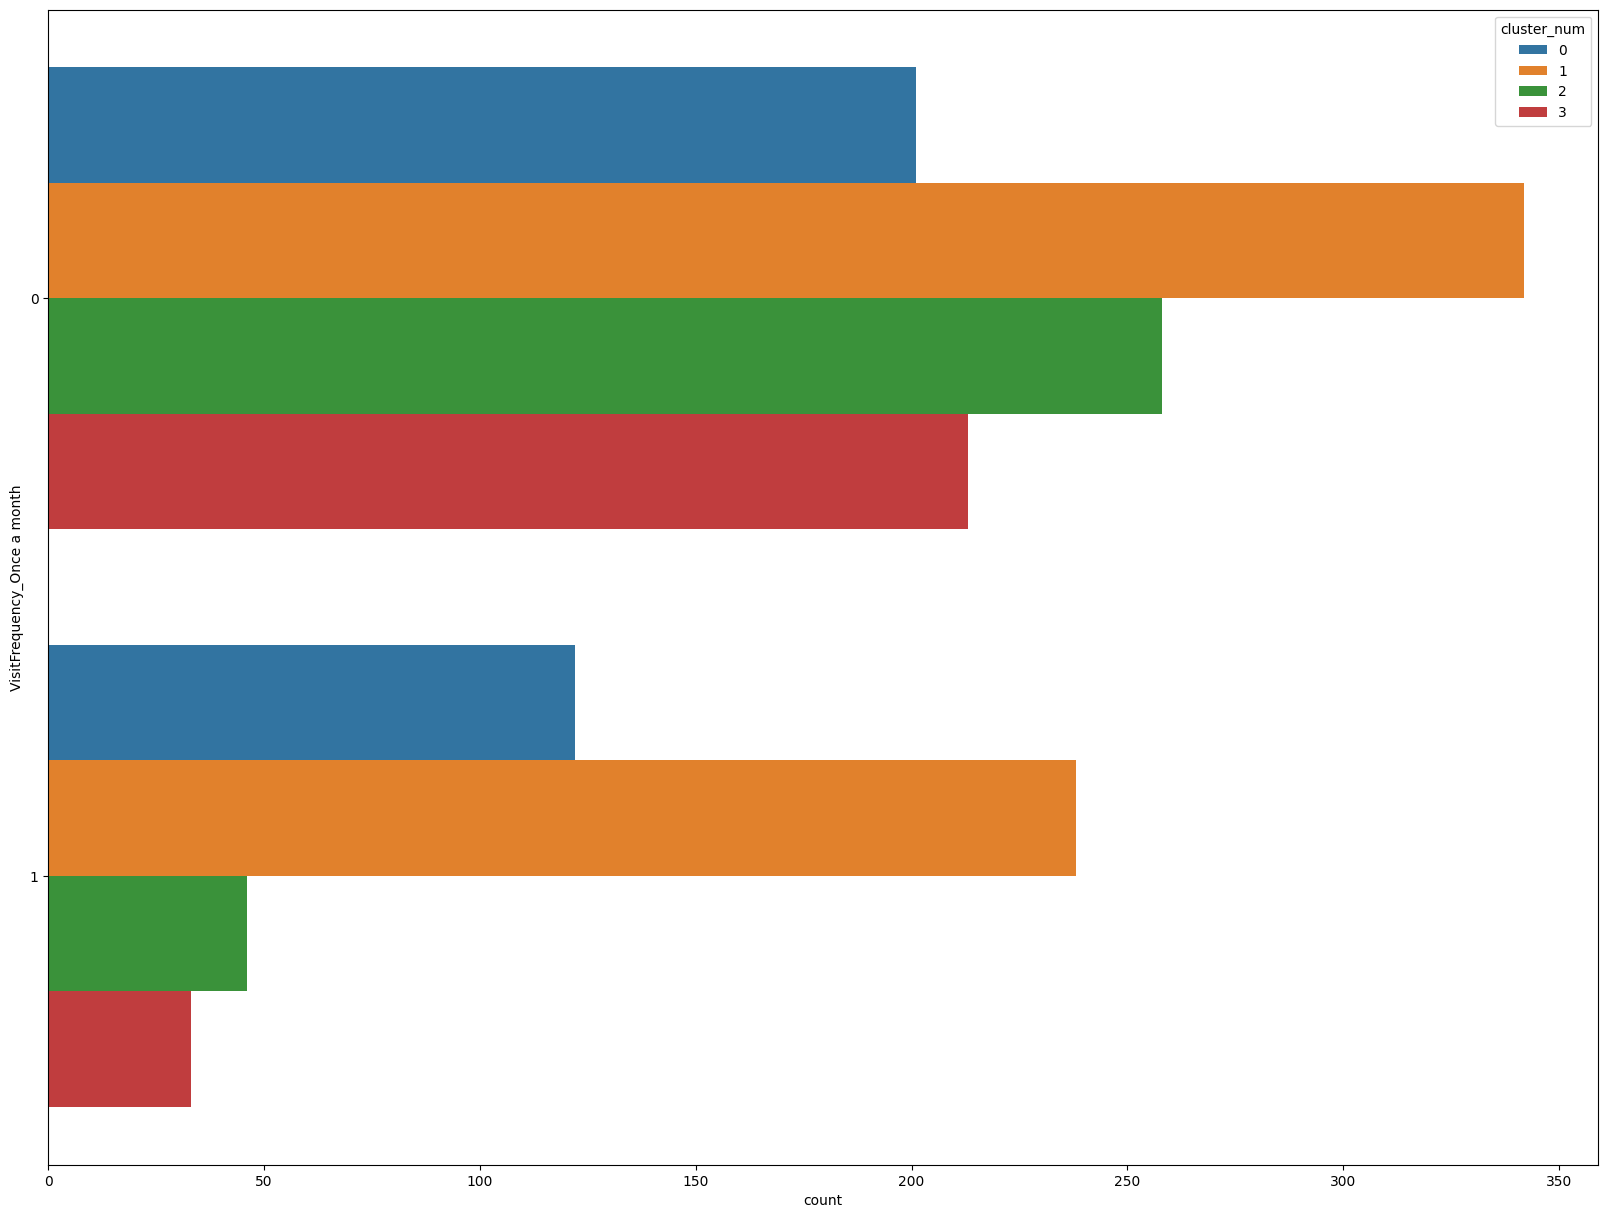

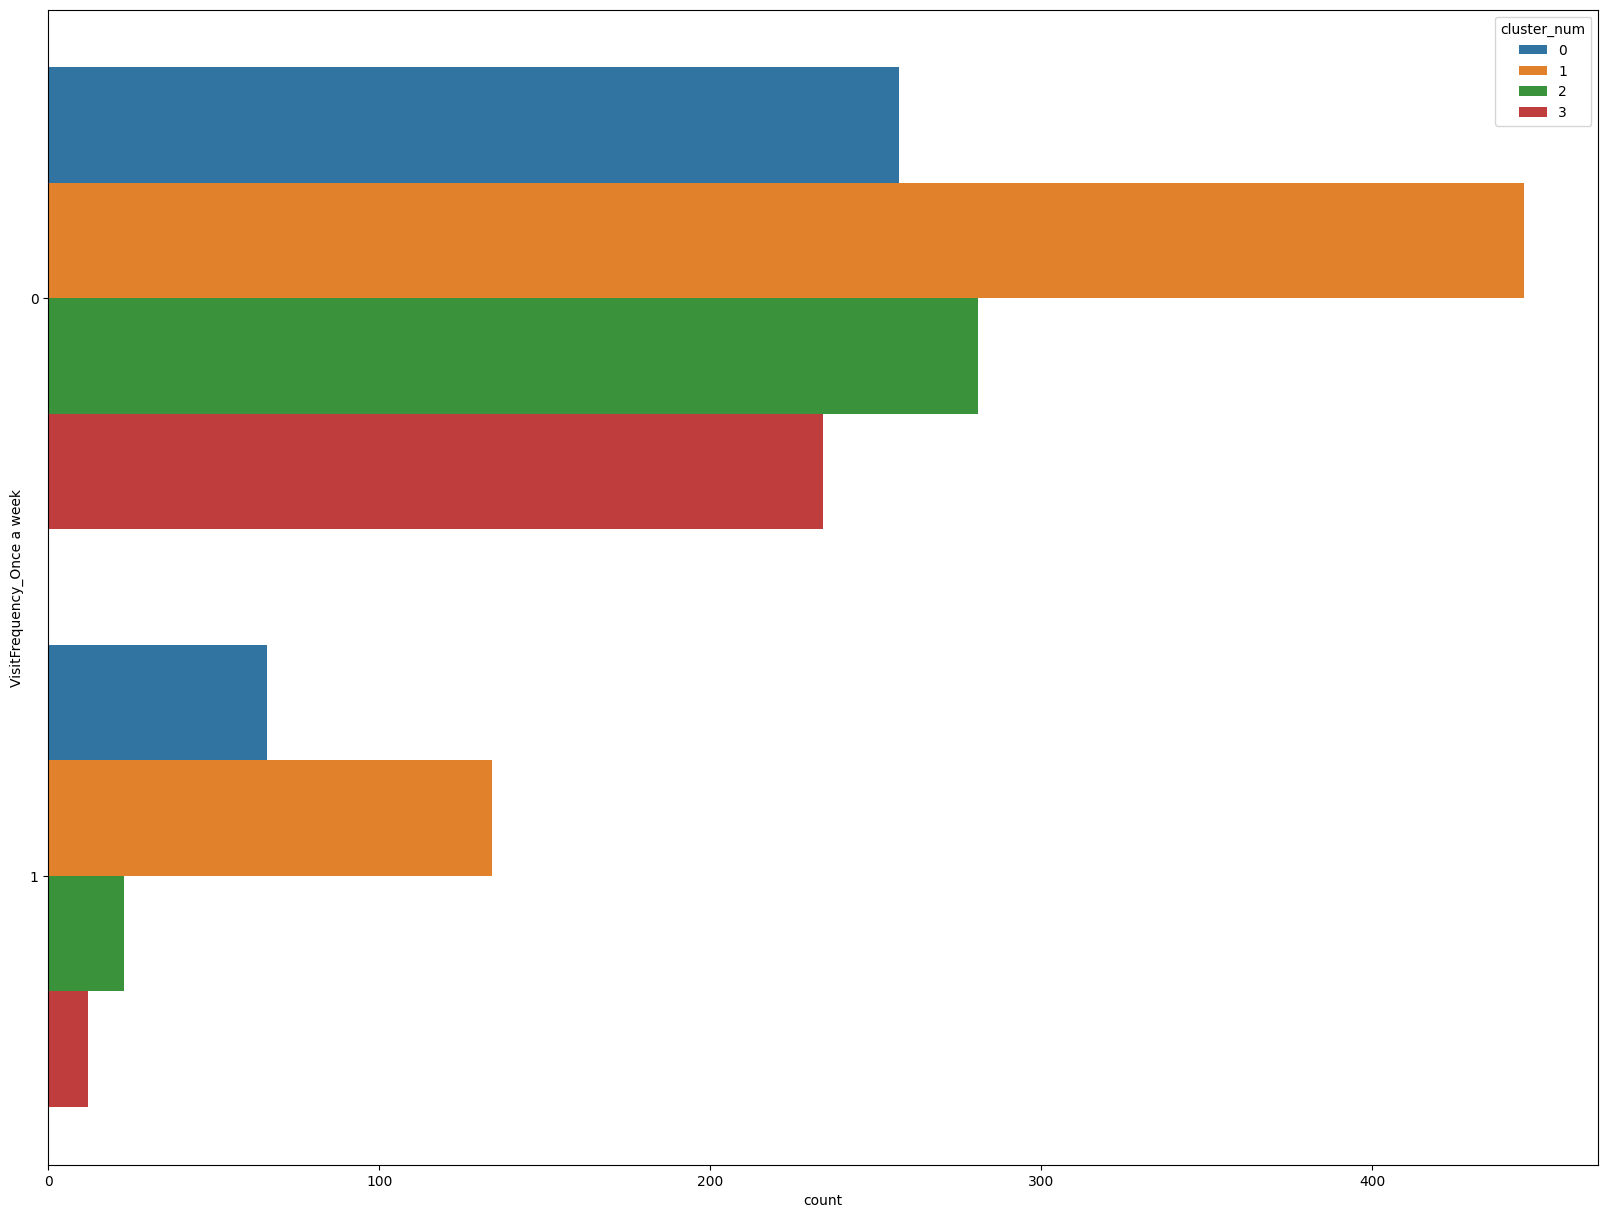

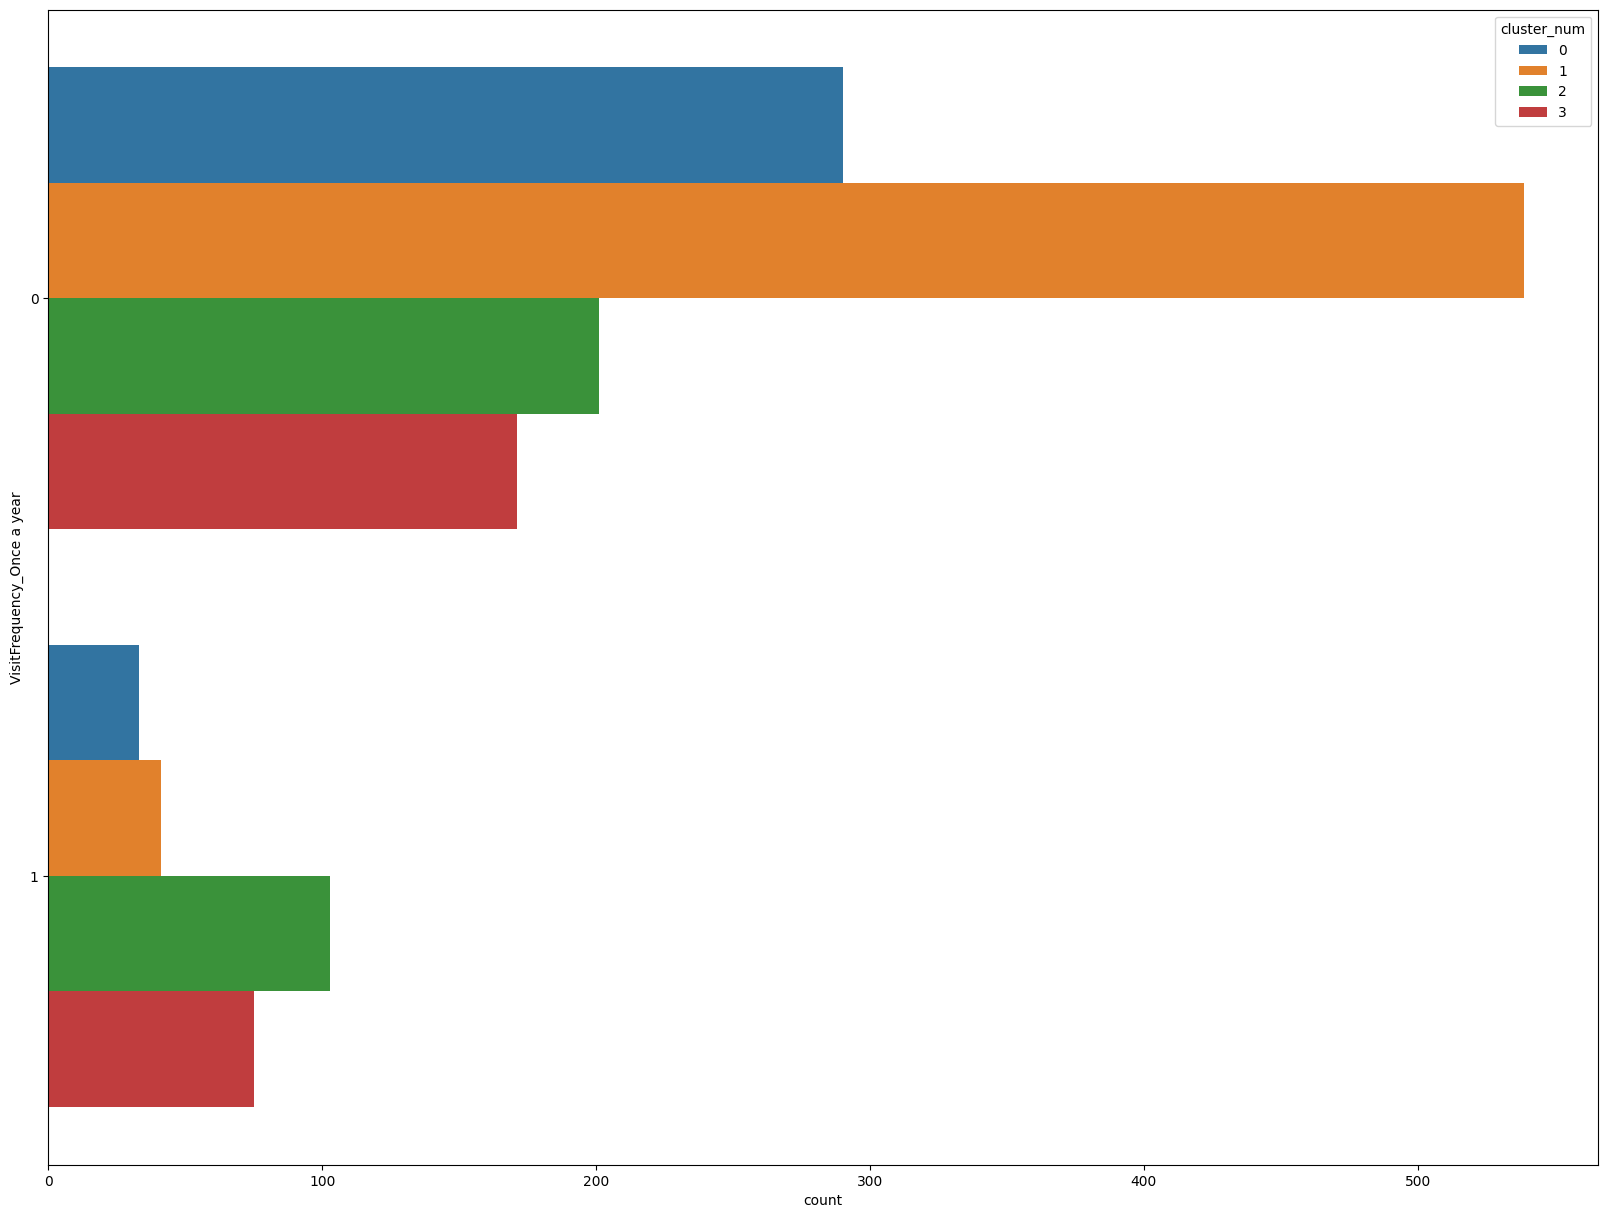

In [47]:
plt.figure(figsize = (9,4))

for i in data1.columns:
    sns.countplot(y = data1[i], hue = data1['cluster_num'], data = data1)
    plt.show()


# Describing Segments

In [48]:
crosstab = pd.crosstab(data['cluster_num'], data['Like'])

In [49]:
crosstab

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
cluster_num,,,,,,,,,,,
0,42,60,66,47,44,7,6,7,3,5,36
1,65,90,143,111,99,13,6,2,4,4,43
2,31,31,12,2,0,25,28,34,36,54,51
3,14,6,8,0,0,13,19,30,28,89,39


<Figure size 500x500 with 0 Axes>

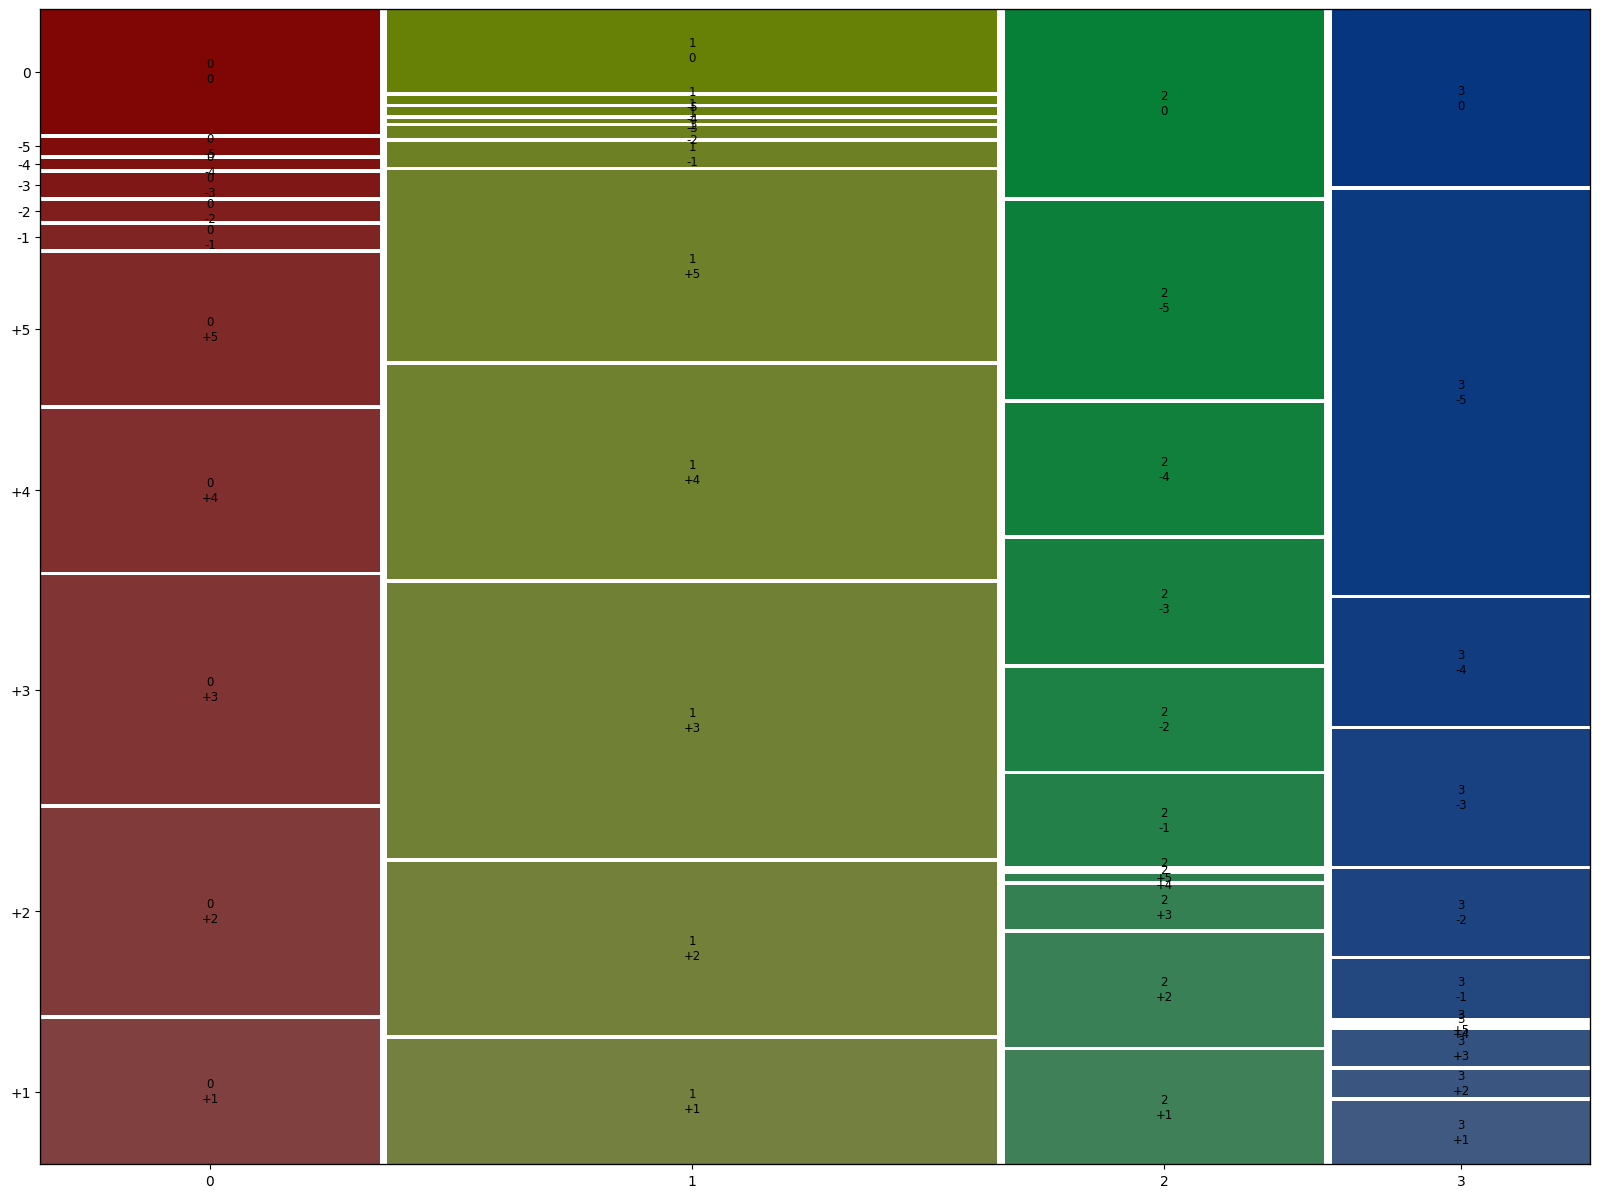

In [50]:
plt.figure(figsize=(5,5))
mosaic(crosstab.stack())
plt.show()

<Figure size 500x500 with 0 Axes>

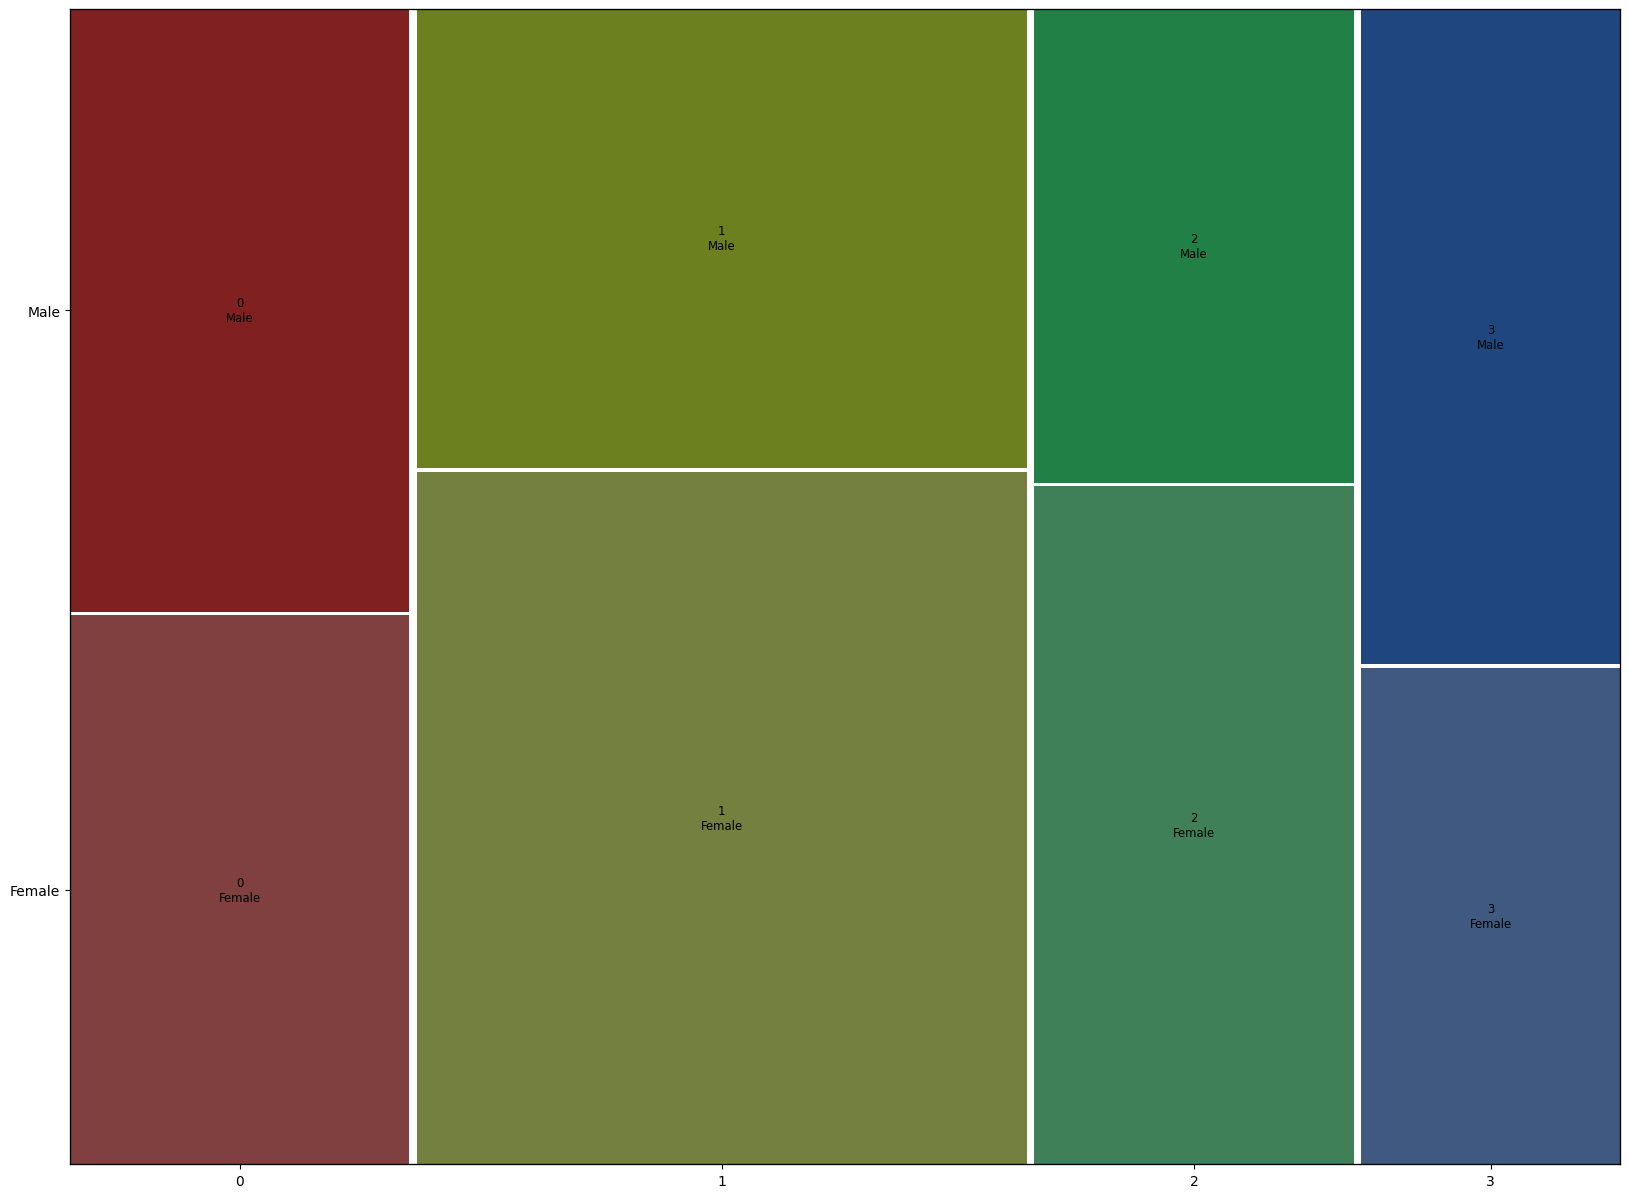

In [51]:
crosstab = pd.crosstab(data['cluster_num'], data['Gender'])
#Reordering cols

plt.figure(figsize = (5,5))
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

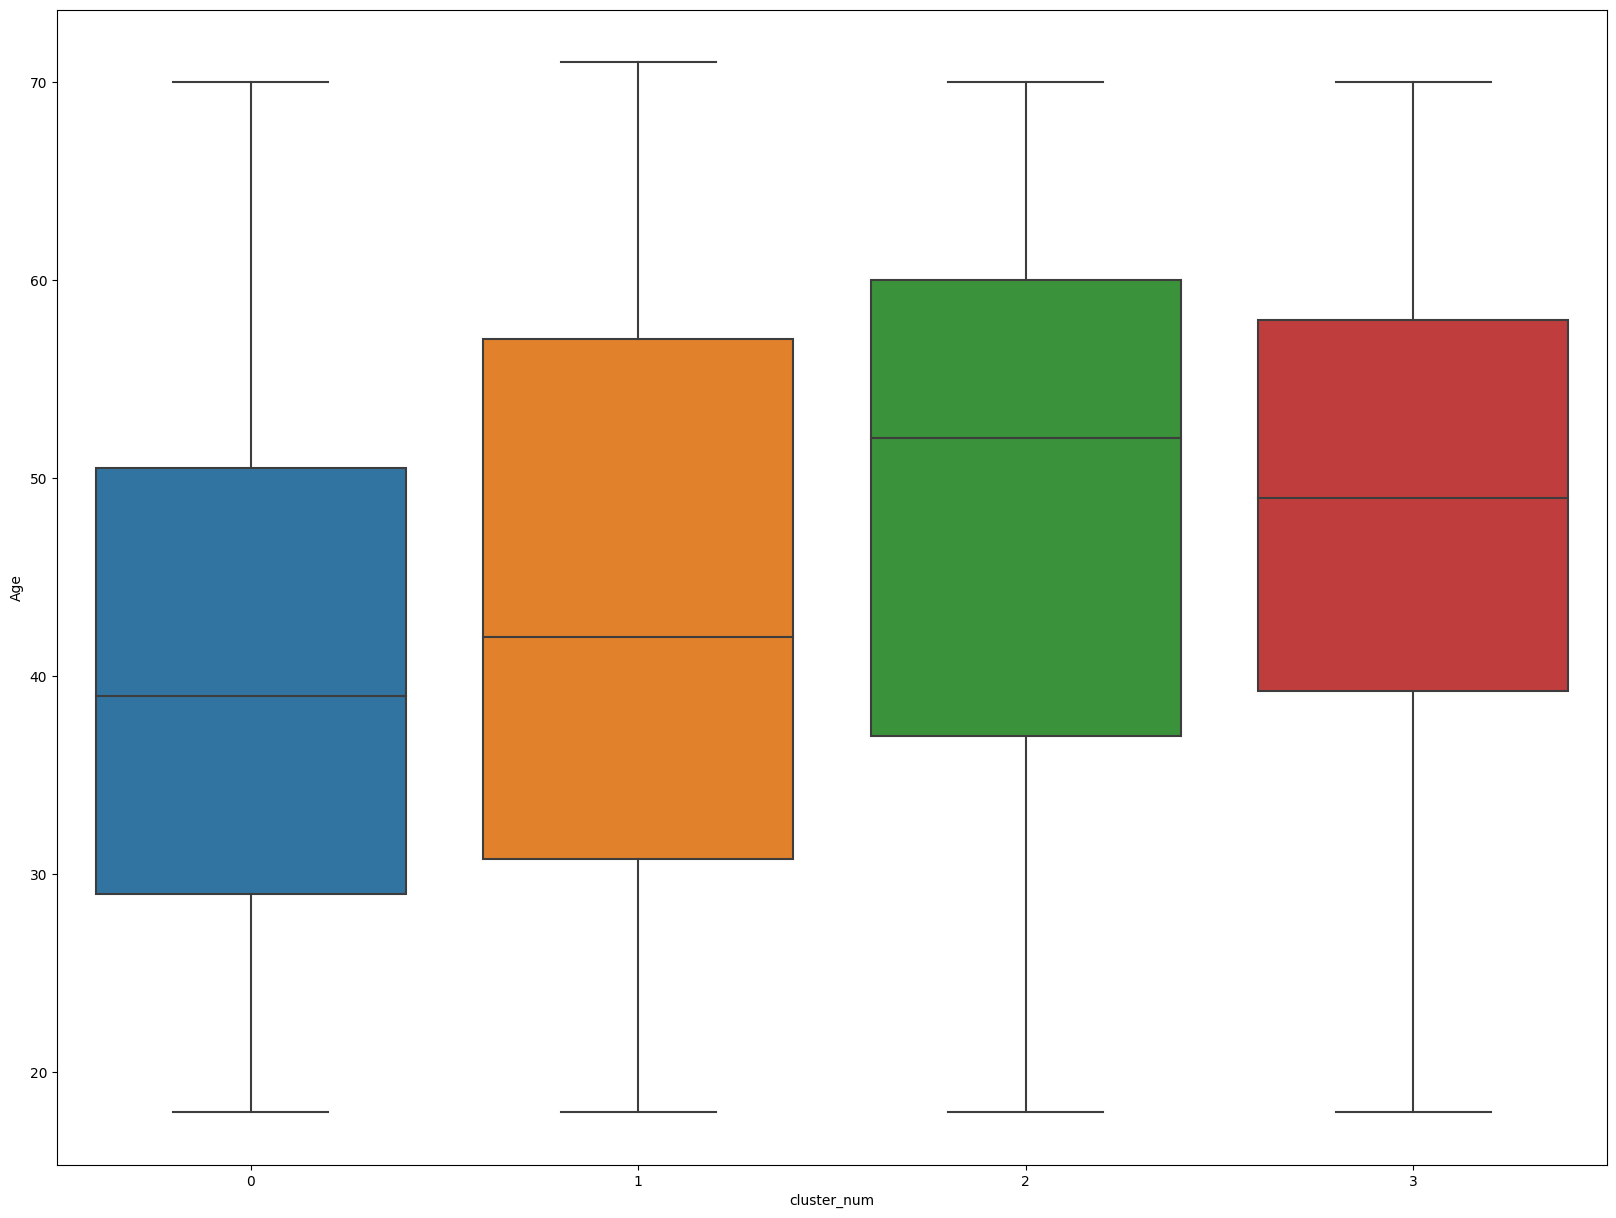

In [52]:
sns.boxplot(x = 'cluster_num', y = 'Age', data = data1)
plt.show()

In [53]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,1


# Selecting the Target Segment

In [54]:
# calculating the mean of 'VisitFrequency'
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [55]:
# calculating the mean of 'Like'

data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [56]:
# calculating the mean of 'Gender'

data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [57]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment


,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


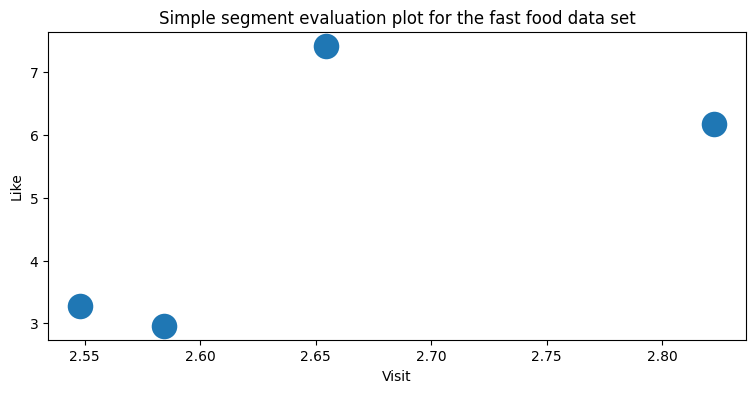

In [58]:
# targeting segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like", data = segment, s=400)
plt.title("Simple segment evaluation plot for the fast food data set") 
plt.xlabel("Visit") 
plt.ylabel("Like") 
plt.show()

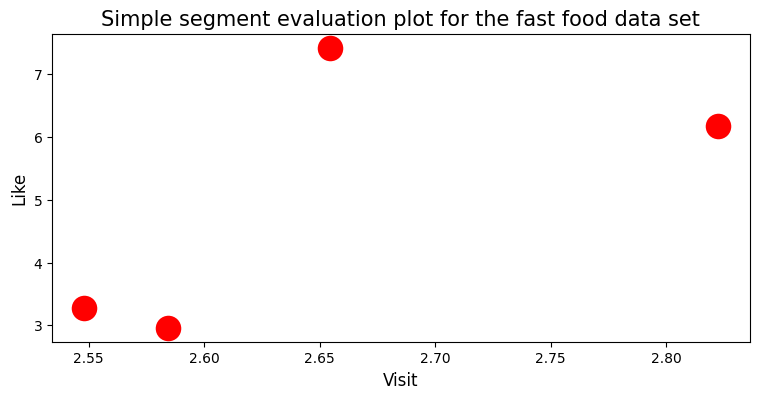

In [59]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()
     

In [71]:
#target segments can be seen

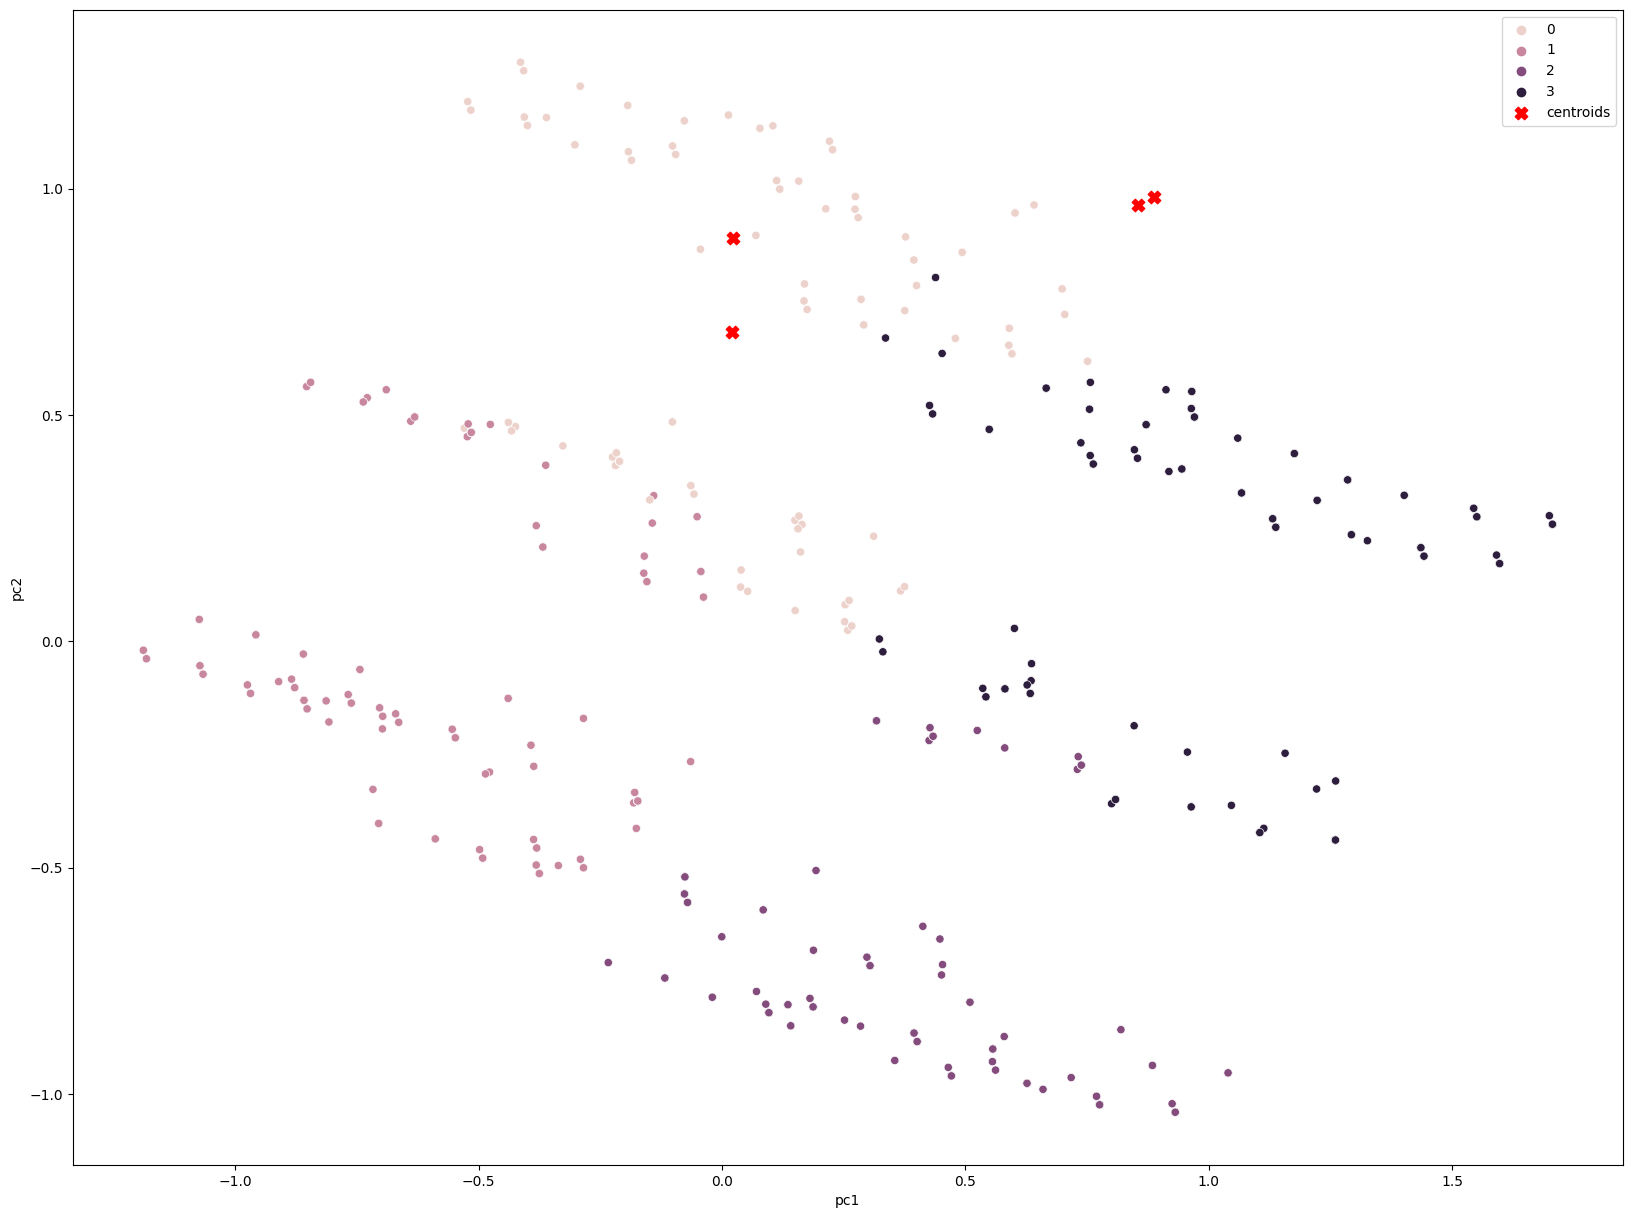

In [61]:
# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [69]:
#cluster visualization can be sen through scatter plot

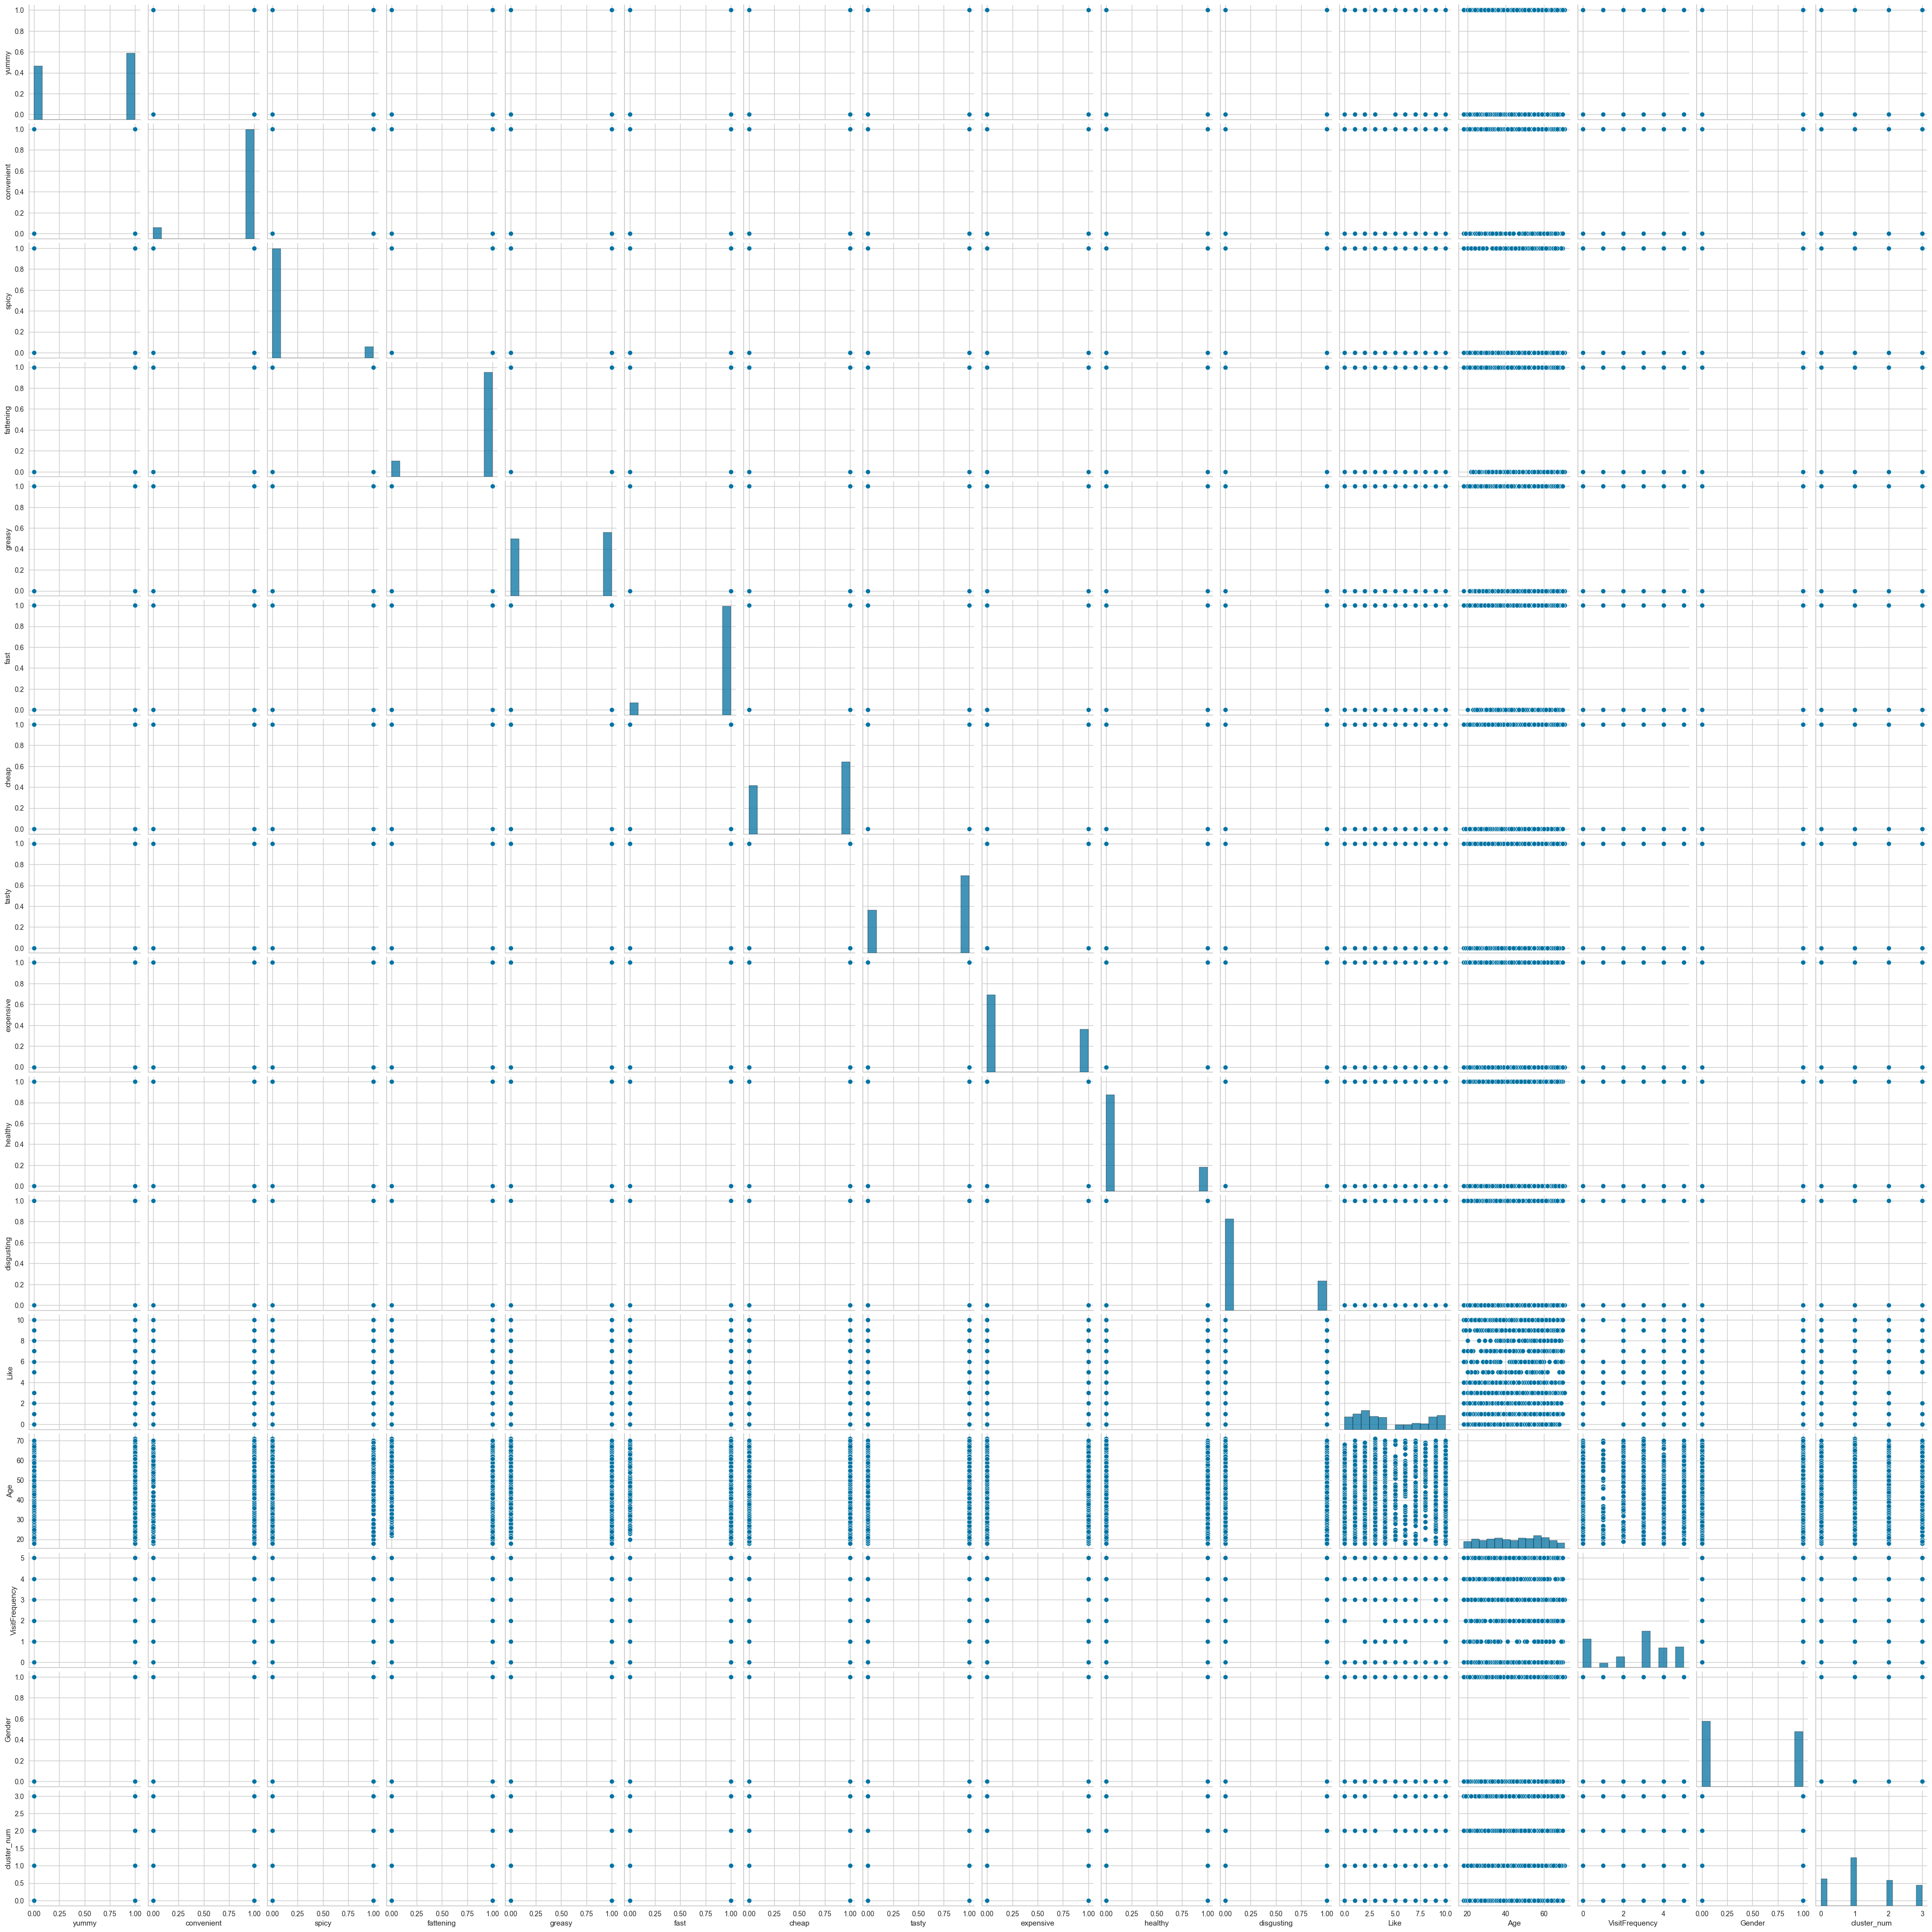

In [70]:
sns.pairplot(data)